# Navigation

---

In this notebook, you will learn how to use the Unity ML-Agents environment for the first project of the [Deep Reinforcement Learning Nanodegree](https://www.udacity.com/course/deep-reinforcement-learning-nanodegree--nd893).

### 1. Start the Environment

We begin by importing some necessary packages.  If the code cell below returns an error, please revisit the project instructions to double-check that you have installed [Unity ML-Agents](https://github.com/Unity-Technologies/ml-agents/blob/master/docs/Installation.md) and [NumPy](http://www.numpy.org/).

In [1]:
from unityagents import UnityEnvironment
import numpy as np

Next, we will start the environment!  **_Before running the code cell below_**, change the `file_name` parameter to match the location of the Unity environment that you downloaded.

- **Mac**: `"path/to/Banana.app"`
- **Windows** (x86): `"path/to/Banana_Windows_x86/Banana.exe"`
- **Windows** (x86_64): `"path/to/Banana_Windows_x86_64/Banana.exe"`
- **Linux** (x86): `"path/to/Banana_Linux/Banana.x86"`
- **Linux** (x86_64): `"path/to/Banana_Linux/Banana.x86_64"`
- **Linux** (x86, headless): `"path/to/Banana_Linux_NoVis/Banana.x86"`
- **Linux** (x86_64, headless): `"path/to/Banana_Linux_NoVis/Banana.x86_64"`

For instance, if you are using a Mac, then you downloaded `Banana.app`.  If this file is in the same folder as the notebook, then the line below should appear as follows:
```
env = UnityEnvironment(file_name="Banana.app")
```

In [2]:
# env = UnityEnvironment(file_name="/home/arasdar/VisualBanana_Linux/Banana.x86")
env = UnityEnvironment(file_name="/home/aras/unity-envs/Banana_Linux/Banana.x86_64")

INFO:unityagents:
'Academy' started successfully!
Unity Academy name: Academy
        Number of Brains: 1
        Number of External Brains : 1
        Lesson number : 0
        Reset Parameters :
		
Unity brain name: BananaBrain
        Number of Visual Observations (per agent): 0
        Vector Observation space type: continuous
        Vector Observation space size (per agent): 37
        Number of stacked Vector Observation: 1
        Vector Action space type: discrete
        Vector Action space size (per agent): 4
        Vector Action descriptions: , , , 


Environments contain **_brains_** which are responsible for deciding the actions of their associated agents. Here we check for the first brain available, and set it as the default brain we will be controlling from Python.

In [3]:
# get the default brain
brain_name = env.brain_names[0]
brain = env.brains[brain_name]

### 2. Examine the State and Action Spaces

The simulation contains a single agent that navigates a large environment.  At each time step, it has four actions at its disposal:
- `0` - walk forward 
- `1` - walk backward
- `2` - turn left
- `3` - turn right

The state space has `37` dimensions and contains the agent's velocity, along with ray-based perception of objects around agent's forward direction.  A reward of `+1` is provided for collecting a yellow banana, and a reward of `-1` is provided for collecting a blue banana. 

Run the code cell below to print some information about the environment.

In [4]:
# reset the environment
env_info = env.reset(train_mode=True)[brain_name]

# number of agents in the environment
print('Number of agents:', len(env_info.agents))

# number of actions
action_size = brain.vector_action_space_size
print('Number of actions:', action_size)

# examine the state space 
state = env_info.vector_observations[0]
# print('States look like:', state)
state_size = len(state)
print('States have length:', state_size)
# print(state.shape, len(env_info.vector_observations), env_info.vector_observations.shape)

Number of agents: 1
Number of actions: 4
States have length: 37


### 3. Take Random Actions in the Environment

In the next code cell, you will learn how to use the Python API to control the agent and receive feedback from the environment.

Once this cell is executed, you will watch the agent's performance, if it selects an action (uniformly) at random with each time step.  A window should pop up that allows you to observe the agent, as it moves through the environment.  

Of course, as part of the project, you'll have to change the code so that the agent is able to use its experience to gradually choose better actions when interacting with the environment!

In [5]:
env_info = env.reset(train_mode=False)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
num_steps = 0
while True:
    num_steps += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        print(state.shape)
        break
    
print("Score: {}".format(score))
num_steps

(37,)
Score: 0.0


300

When finished, you can close the environment.

In [6]:
# env.close()

### 4. It's Your Turn!

Now it's your turn to train your own agent to solve the environment!  When training the environment, set `train_mode=True`, so that the line for resetting the environment looks like the following:
```python
env_info = env.reset(train_mode=True)[brain_name]
```

In [7]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
num_steps = 0
while True:
    num_steps += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    state = next_state                             # roll over the state to next time step
    #print(state)
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
num_steps

Score: 1.0


300

In [8]:
# In this one we should define and detect GPUs for tensorflow
# GPUs or CPU
import tensorflow as tf

# Check TensorFlow Version
print('TensorFlow Version: {}'.format(tf.__version__))

# Check for a GPU
print('Default GPU Device: {}'.format(tf.test.gpu_device_name()))

TensorFlow Version: 1.7.1
Default GPU Device: 


In [9]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]            # get the current state
score = 0                                          # initialize the score
batch = []
num_steps = 0
while True: # infinite number of steps
    num_steps += 1
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    score += reward                                # update the score
    #print(state, action, reward, done)
    batch.append([state, action, next_state, reward, float(done)])
    state = next_state                             # roll over the state to next time step
    if done:                                       # exit loop if episode finished
        break
    
print("Score: {}".format(score))
num_steps

Score: -1.0


300

In [10]:
batch[0], batch[0][1]

([array([1.        , 0.        , 0.        , 0.        , 0.41103721,
         0.        , 1.        , 0.        , 0.        , 0.40960541,
         0.        , 0.        , 1.        , 0.        , 0.04057696,
         1.        , 0.        , 0.        , 0.        , 0.253993  ,
         0.        , 1.        , 0.        , 0.        , 0.30345654,
         1.        , 0.        , 0.        , 0.        , 0.19119175,
         0.        , 1.        , 0.        , 0.        , 0.3996276 ,
         0.        , 0.        ]),
  1,
  array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          4.13363189e-01,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
          0.00000000e+00,  4.20221478e-01,  0.00000000e+00,  0.00000000e+00,
          1.00000000e+00,  0.00000000e+00,  1.97705254e-02,  1.00000000e+00,
          0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.57217348e-01,
          0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
          2.984

In [11]:
batch[0]

[array([1.        , 0.        , 0.        , 0.        , 0.41103721,
        0.        , 1.        , 0.        , 0.        , 0.40960541,
        0.        , 0.        , 1.        , 0.        , 0.04057696,
        1.        , 0.        , 0.        , 0.        , 0.253993  ,
        0.        , 1.        , 0.        , 0.        , 0.30345654,
        1.        , 0.        , 0.        , 0.        , 0.19119175,
        0.        , 1.        , 0.        , 0.        , 0.3996276 ,
        0.        , 0.        ]),
 1,
 array([ 1.00000000e+00,  0.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         4.13363189e-01,  0.00000000e+00,  1.00000000e+00,  0.00000000e+00,
         0.00000000e+00,  4.20221478e-01,  0.00000000e+00,  0.00000000e+00,
         1.00000000e+00,  0.00000000e+00,  1.97705254e-02,  1.00000000e+00,
         0.00000000e+00,  0.00000000e+00,  0.00000000e+00,  2.57217348e-01,
         0.00000000e+00,  1.00000000e+00,  0.00000000e+00,  0.00000000e+00,
         2.98469961e-01,  1.00

In [12]:
states = np.array([each[1] for each in batch])
actions = np.array([each[0] for each in batch])
next_states = np.array([each[1] for each in batch])
rewards = np.array([each[2] for each in batch])
dones = np.array([each[3] for each in batch])
# infos = np.array([each[4] for each in batch])

In [13]:
# print(rewards[:])
print(np.array(rewards).shape, np.array(states).shape, np.array(actions).shape, np.array(dones).shape)
print(np.array(rewards).dtype, np.array(states).dtype, np.array(actions).dtype, np.array(dones).dtype)
print(np.max(np.array(actions)), np.min(np.array(actions)), 
      (np.max(np.array(actions)) - np.min(np.array(actions)))+1)
print(np.max(np.array(rewards)), np.min(np.array(rewards)))
print(np.max(np.array(states)), np.min(np.array(states)))

(300, 37) (300,) (300, 37) (300,)
float64 int64 float64 float64
10.685667037963867 -11.902753829956055 23.588420867919922
10.685667037963867 -11.902753829956055
3 0


In [14]:
def model_input(state_size, lstm_size, batch_size=1):
    states = tf.placeholder(tf.float32, [None, state_size], name='states')
    actions = tf.placeholder(tf.int32, [None], name='actions')
    targetQs = tf.placeholder(tf.float32, [None], name='targetQs')
    # RNN
    gru = tf.nn.rnn_cell.GRUCell(lstm_size)
    cell = tf.nn.rnn_cell.MultiRNNCell([gru], state_is_tuple=False)
    initial_state = cell.zero_state(batch_size, tf.float32)
    return states, actions, targetQs, cell, initial_state

In [15]:
# RNN generator or sequence generator
def generator(states, initial_state, cell, lstm_size, num_classes, reuse=False): 
    with tf.variable_scope('generator', reuse=reuse):
        # First fully connected layer
        inputs = tf.layers.dense(inputs=states, units=lstm_size)
        print(states.shape, inputs.shape)
        
        # with tf.variable_scope('dynamic_rnn_', reuse=tf.AUTO_REUSE):
        # dynamic means adapt to the batch_size
        inputs_rnn = tf.reshape(inputs, [1, -1, lstm_size]) # NxH -> 1xNxH
        print(inputs_rnn.shape, initial_state.shape)
        outputs_rnn, final_state = tf.nn.dynamic_rnn(cell=cell, inputs=inputs_rnn, initial_state=initial_state)
        print(outputs_rnn.shape, final_state.shape)
        outputs = tf.reshape(outputs_rnn, [-1, lstm_size]) # 1xNxH -> NxH
        print(outputs.shape)

        # Last fully connected layer
        logits = tf.layers.dense(inputs=outputs, units=num_classes)
        print(logits.shape)
        #predictions = tf.nn.softmax(logits)
        
        # logits are the action logits
        return logits, final_state

In [16]:
def model_loss(action_size, hidden_size, states, cell, initial_state, actions, targetQs):
    actions_logits, final_state = generator(states=states, cell=cell, initial_state=initial_state, 
                                            lstm_size=hidden_size, num_classes=action_size)
    actions_labels = tf.one_hot(indices=actions, depth=action_size, dtype=actions_logits.dtype)
    Qs = tf.reduce_max(actions_logits*actions_labels, axis=1)
    loss = tf.reduce_mean(tf.square(Qs - targetQs))
    return actions_logits, final_state, loss

In [17]:
def model_opt(loss, learning_rate):
    # Get weights and bias to update
    t_vars = tf.trainable_variables()
    g_vars = [var for var in t_vars if var.name.startswith('generator')]

    # # Optimize
    # with tf.control_dependencies(tf.get_collection(tf.GraphKeys.UPDATE_OPS)): # Required for batchnorm (BN)
    # #opt = tf.train.AdamOptimizer(learning_rate).minimize(loss, var_list=g_vars)

    #grads, _ = tf.clip_by_global_norm(t_list=tf.gradients(loss, g_vars), clip_norm=5) # usually around 1-5
    grads = tf.gradients(loss, g_vars)
    opt = tf.train.AdamOptimizer(learning_rate).apply_gradients(grads_and_vars=zip(grads, g_vars))

    return opt

In [18]:
class Model:
    def __init__(self, state_size, action_size, hidden_size, learning_rate):

        # Data of the Model: make the data available inside the framework
        self.states, self.actions, self.targetQs, cell, self.initial_state = model_input(
            state_size=state_size, lstm_size=hidden_size)
        
        # Create the Model: calculating the loss and forwad pass
        self.actions_logits, self.final_state, self.loss = model_loss(
            action_size=action_size, hidden_size=hidden_size, 
            states=self.states, actions=self.actions, 
            targetQs=self.targetQs, cell=cell, initial_state=self.initial_state)

        # Update the model: backward pass and backprop
        self.opt = model_opt(loss=self.loss, learning_rate=learning_rate)

In [19]:
from collections import deque

class Memory():    
    def __init__(self, max_size = 1000):
        self.buffer = deque(maxlen=max_size)
        self.states = deque(maxlen=max_size)

In [20]:
# Network parameters
action_size = 4
state_size = 37
hidden_size = 37*2             # number of units in each Q-network hidden layer
learning_rate = 0.0001         # Q-network learning rate

# Memory parameters
memory_size = 100            # memory capacity
batch_size = 100             # experience mini-batch size
gamma = 0.99                 # future reward discount

In [21]:
# Reset/init the graph/session
graph = tf.reset_default_graph()

# Init the model
model = Model(action_size=action_size, hidden_size=hidden_size, state_size=state_size, learning_rate=learning_rate)

# Init the memory
memory = Memory(max_size=memory_size)

(?, 37) (?, 74)
(1, ?, 74) (1, 74)
(1, ?, 74) (1, 74)
(?, 74)
(?, 4)


In [22]:
# state = env.reset()
# for _ in range(batch_size):
#     action = env.action_space.sample()
#     next_state, reward, done, _ = env.step(action)
#     memory.buffer.append([state, action, next_state, reward, float(done)])
#     state = next_state
#     if done is True:
#         state = env.reset()

In [23]:
env_info = env.reset(train_mode=True)[brain_name] # reset the environment
state = env_info.vector_observations[0]   # get the state
for _ in range(memory_size):
    action = np.random.randint(action_size)        # select an action
    env_info = env.step(action)[brain_name]        # send the action to the environment
    next_state = env_info.vector_observations[0]   # get the next state
    reward = env_info.rewards[0]                   # get the reward
    done = env_info.local_done[0]                  # see if episode has finished
    memory.buffer.append([state, action, next_state, reward, float(done)])
    memory.states.append(np.zeros([1, hidden_size])) # initial_states for rnn/mem
    state = next_state
    if done:                                       # exit loop if episode finished
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the state
        break

In [24]:
# initial_states = memory.states
memory.states[0].shape

(1, 74)

In [25]:
# Save/load the model and save for plotting
saver = tf.train.Saver()
episode_rewards_list, rewards_list, loss_list = [], [], []

# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    #saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    total_step = 0 # Explore or exploit parameter
    episode_reward = deque(maxlen=100) # 100 episodes average/running average/running mean/window
    
    # Training episodes/epochs
    for ep in range(11111):
        total_reward = 0
        loss_batch = []
        #state = env.reset()
        env_info = env.reset(train_mode=True)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state
        initial_state = sess.run(model.initial_state)

        # Training steps/batches
        for num_steps in range(11111111111):
            action_logits, final_state = sess.run([model.actions_logits, model.final_state],
                                                  feed_dict = {model.states: state.reshape([1, -1]), 
                                                               model.initial_state: initial_state})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            next_state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            memory.buffer.append([state, action, next_state, reward, float(done)])
            memory.states.append(initial_state)
            total_reward += reward
            initial_state = final_state
            state = next_state
            
            # Training
            #batch, rnn_states = memory.sample(batch_size)
            batch = memory.buffer
            states = np.array([each[0] for each in batch])
            actions = np.array([each[1] for each in batch])
            next_states = np.array([each[2] for each in batch])
            rewards = np.array([each[3] for each in batch])
            dones = np.array([each[4] for each in batch])
            initial_states = memory.states
            next_actions_logits = sess.run(model.actions_logits,
                                           feed_dict = {model.states: next_states, 
                                                        model.initial_state: initial_states[1]})
            nextQs = np.max(next_actions_logits, axis=1) * (1-dones)
            targetQs = rewards + (gamma * nextQs)
            loss, _ = sess.run([model.loss, model.opt], feed_dict = {model.states: states, 
                                                                     model.actions: actions,
                                                                     model.targetQs: targetQs,
                                                                     model.initial_state: initial_states[0]})
            loss_batch.append(loss)
            if done is True:
                break
                
        episode_reward.append(total_reward)
        print('Episode:{}'.format(ep),
              'meanR:{:.4f}'.format(np.mean(episode_reward)),
              'R:{}'.format(total_reward),
              'Steps:{}'.format(num_steps),
              'loss:{:.4f}'.format(np.mean(loss_batch)))
        # Ploting out
        episode_rewards_list.append([ep, np.mean(episode_reward)])
        rewards_list.append([ep, total_reward])
        loss_list.append([ep, np.mean(loss_batch)])
        # Break episode/epoch loop
        if np.mean(episode_reward) >= +13:
            break
            
    # At the end of all training episodes/epochs
    saver.save(sess, 'checkpoints/model.ckpt')

Episode:0 meanR:0.0000 R:0.0 Steps:299 loss:0.1020
Episode:1 meanR:0.0000 R:0.0 Steps:299 loss:0.0357
Episode:2 meanR:0.0000 R:0.0 Steps:299 loss:0.0363
Episode:3 meanR:0.0000 R:0.0 Steps:299 loss:0.0191
Episode:4 meanR:0.2000 R:1.0 Steps:299 loss:0.0113
Episode:5 meanR:0.1667 R:0.0 Steps:299 loss:0.0160
Episode:6 meanR:0.1429 R:0.0 Steps:299 loss:0.0157
Episode:7 meanR:0.1250 R:0.0 Steps:299 loss:0.0371
Episode:8 meanR:0.1111 R:0.0 Steps:299 loss:0.0060
Episode:9 meanR:0.0000 R:-1.0 Steps:299 loss:0.0129
Episode:10 meanR:0.0000 R:0.0 Steps:299 loss:0.0166
Episode:11 meanR:-0.2500 R:-3.0 Steps:299 loss:0.0332
Episode:12 meanR:0.0000 R:3.0 Steps:299 loss:0.0310
Episode:13 meanR:0.7143 R:10.0 Steps:299 loss:0.0693
Episode:14 meanR:0.7333 R:1.0 Steps:299 loss:0.0270
Episode:15 meanR:0.7500 R:1.0 Steps:299 loss:0.0334
Episode:16 meanR:0.8824 R:3.0 Steps:299 loss:0.0445
Episode:17 meanR:0.7778 R:-1.0 Steps:299 loss:0.0269
Episode:18 meanR:0.9474 R:4.0 Steps:299 loss:0.0450
Episode:19 meanR:

Episode:156 meanR:6.3800 R:0.0 Steps:299 loss:0.0222
Episode:157 meanR:6.3000 R:-2.0 Steps:299 loss:0.0375
Episode:158 meanR:6.2100 R:0.0 Steps:299 loss:0.0381
Episode:159 meanR:6.1600 R:6.0 Steps:299 loss:0.0331
Episode:160 meanR:6.1200 R:3.0 Steps:299 loss:0.0790
Episode:161 meanR:6.1100 R:5.0 Steps:299 loss:0.0409
Episode:162 meanR:6.0600 R:1.0 Steps:299 loss:0.0219
Episode:163 meanR:6.0700 R:6.0 Steps:299 loss:0.0458
Episode:164 meanR:5.9700 R:0.0 Steps:299 loss:0.0285
Episode:165 meanR:5.8900 R:2.0 Steps:299 loss:0.0407
Episode:166 meanR:5.8100 R:2.0 Steps:299 loss:0.0291
Episode:167 meanR:5.7100 R:0.0 Steps:299 loss:0.0201
Episode:168 meanR:5.6600 R:1.0 Steps:299 loss:0.0313
Episode:169 meanR:5.6300 R:-1.0 Steps:299 loss:0.0241
Episode:170 meanR:5.5300 R:2.0 Steps:299 loss:0.0436
Episode:171 meanR:5.5600 R:6.0 Steps:299 loss:0.0578
Episode:172 meanR:5.5400 R:2.0 Steps:299 loss:0.0494
Episode:173 meanR:5.5400 R:5.0 Steps:299 loss:0.0588
Episode:174 meanR:5.4300 R:-1.0 Steps:299 lo

Episode:310 meanR:6.2200 R:1.0 Steps:299 loss:0.0528
Episode:311 meanR:6.3400 R:12.0 Steps:299 loss:0.0559
Episode:312 meanR:6.3800 R:5.0 Steps:299 loss:0.0364
Episode:313 meanR:6.4900 R:11.0 Steps:299 loss:0.0631
Episode:314 meanR:6.5100 R:4.0 Steps:299 loss:0.0380
Episode:315 meanR:6.5500 R:6.0 Steps:299 loss:0.0431
Episode:316 meanR:6.6000 R:6.0 Steps:299 loss:0.0400
Episode:317 meanR:6.7700 R:17.0 Steps:299 loss:0.0807
Episode:318 meanR:6.7900 R:3.0 Steps:299 loss:0.0566
Episode:319 meanR:6.8300 R:8.0 Steps:299 loss:0.0621
Episode:320 meanR:6.8800 R:9.0 Steps:299 loss:0.0725
Episode:321 meanR:6.8800 R:6.0 Steps:299 loss:0.0385
Episode:322 meanR:6.9000 R:7.0 Steps:299 loss:0.0610
Episode:323 meanR:6.9000 R:4.0 Steps:299 loss:0.0708
Episode:324 meanR:6.8000 R:0.0 Steps:299 loss:0.0281
Episode:325 meanR:6.7400 R:5.0 Steps:299 loss:0.0427
Episode:326 meanR:6.6900 R:1.0 Steps:299 loss:0.0321
Episode:327 meanR:6.6200 R:-1.0 Steps:299 loss:0.0341
Episode:328 meanR:6.6000 R:2.0 Steps:299 l

Episode:465 meanR:3.8800 R:2.0 Steps:299 loss:0.0279
Episode:466 meanR:3.8400 R:1.0 Steps:299 loss:0.0103
Episode:467 meanR:3.7700 R:2.0 Steps:299 loss:0.0135
Episode:468 meanR:3.8000 R:5.0 Steps:299 loss:0.0419
Episode:469 meanR:3.7500 R:1.0 Steps:299 loss:0.0416
Episode:470 meanR:3.7400 R:3.0 Steps:299 loss:0.0540
Episode:471 meanR:3.6700 R:1.0 Steps:299 loss:0.0318
Episode:472 meanR:3.6500 R:5.0 Steps:299 loss:0.0318
Episode:473 meanR:3.6600 R:0.0 Steps:299 loss:0.0318
Episode:474 meanR:3.6200 R:-1.0 Steps:299 loss:0.0304
Episode:475 meanR:3.5900 R:-1.0 Steps:299 loss:0.0212
Episode:476 meanR:3.5800 R:-1.0 Steps:299 loss:0.0134
Episode:477 meanR:3.5600 R:3.0 Steps:299 loss:0.0259
Episode:478 meanR:3.5700 R:3.0 Steps:299 loss:0.0349
Episode:479 meanR:3.5200 R:1.0 Steps:299 loss:0.0346
Episode:480 meanR:3.5000 R:7.0 Steps:299 loss:0.0403
Episode:481 meanR:3.5400 R:5.0 Steps:299 loss:0.0562
Episode:482 meanR:3.6500 R:12.0 Steps:299 loss:0.0511
Episode:483 meanR:3.6900 R:5.0 Steps:299 l

Episode:619 meanR:5.7200 R:2.0 Steps:299 loss:0.0312
Episode:620 meanR:5.7500 R:5.0 Steps:299 loss:0.0252
Episode:621 meanR:5.8900 R:14.0 Steps:299 loss:0.0330
Episode:622 meanR:6.0000 R:12.0 Steps:299 loss:0.0535
Episode:623 meanR:6.0800 R:17.0 Steps:299 loss:0.0799
Episode:624 meanR:6.1100 R:9.0 Steps:299 loss:0.0680
Episode:625 meanR:6.1400 R:10.0 Steps:299 loss:0.0552
Episode:626 meanR:6.1300 R:11.0 Steps:299 loss:0.0680
Episode:627 meanR:6.0800 R:6.0 Steps:299 loss:0.0525
Episode:628 meanR:6.0700 R:10.0 Steps:299 loss:0.0438
Episode:629 meanR:6.1500 R:8.0 Steps:299 loss:0.0431
Episode:630 meanR:6.2100 R:9.0 Steps:299 loss:0.0367
Episode:631 meanR:6.1500 R:3.0 Steps:299 loss:0.0679
Episode:632 meanR:6.1700 R:3.0 Steps:299 loss:0.0563
Episode:633 meanR:6.1100 R:1.0 Steps:299 loss:0.0588
Episode:634 meanR:6.0800 R:2.0 Steps:299 loss:0.0463
Episode:635 meanR:6.0600 R:1.0 Steps:299 loss:0.0316
Episode:636 meanR:6.1400 R:11.0 Steps:299 loss:0.0490
Episode:637 meanR:6.1500 R:6.0 Steps:29

Episode:773 meanR:5.7400 R:-1.0 Steps:299 loss:0.0582
Episode:774 meanR:5.7500 R:0.0 Steps:299 loss:0.0566
Episode:775 meanR:5.7500 R:2.0 Steps:299 loss:0.0384
Episode:776 meanR:5.6800 R:2.0 Steps:299 loss:0.0381
Episode:777 meanR:5.6800 R:1.0 Steps:299 loss:0.0536
Episode:778 meanR:5.5800 R:0.0 Steps:299 loss:0.0611
Episode:779 meanR:5.5700 R:3.0 Steps:299 loss:0.0442
Episode:780 meanR:5.5900 R:2.0 Steps:299 loss:0.0358
Episode:781 meanR:5.5400 R:4.0 Steps:299 loss:0.0382
Episode:782 meanR:5.4400 R:0.0 Steps:299 loss:0.0169
Episode:783 meanR:5.4200 R:0.0 Steps:299 loss:0.0295
Episode:784 meanR:5.4000 R:0.0 Steps:299 loss:0.0328
Episode:785 meanR:5.3400 R:0.0 Steps:299 loss:0.0182
Episode:786 meanR:5.3000 R:0.0 Steps:299 loss:0.0170
Episode:787 meanR:5.2500 R:-2.0 Steps:299 loss:0.0113
Episode:788 meanR:5.2300 R:5.0 Steps:299 loss:0.0219
Episode:789 meanR:5.1300 R:1.0 Steps:299 loss:0.0200
Episode:790 meanR:5.0600 R:2.0 Steps:299 loss:0.0206
Episode:791 meanR:4.9800 R:2.0 Steps:299 los

Episode:927 meanR:9.3800 R:10.0 Steps:299 loss:0.0595
Episode:928 meanR:9.4000 R:7.0 Steps:299 loss:0.0467
Episode:929 meanR:9.5100 R:14.0 Steps:299 loss:0.0439
Episode:930 meanR:9.5100 R:7.0 Steps:299 loss:0.0503
Episode:931 meanR:9.4900 R:9.0 Steps:299 loss:0.0605
Episode:932 meanR:9.5400 R:5.0 Steps:299 loss:0.0314
Episode:933 meanR:9.5400 R:9.0 Steps:299 loss:0.0437
Episode:934 meanR:9.4900 R:9.0 Steps:299 loss:0.0411
Episode:935 meanR:9.5000 R:8.0 Steps:299 loss:0.0325
Episode:936 meanR:9.5600 R:11.0 Steps:299 loss:0.0427
Episode:937 meanR:9.5800 R:5.0 Steps:299 loss:0.0500
Episode:938 meanR:9.6100 R:8.0 Steps:299 loss:0.0357
Episode:939 meanR:9.6000 R:6.0 Steps:299 loss:0.0411
Episode:940 meanR:9.6400 R:10.0 Steps:299 loss:0.0721
Episode:941 meanR:9.5900 R:7.0 Steps:299 loss:0.0882
Episode:942 meanR:9.4500 R:0.0 Steps:299 loss:0.0344
Episode:943 meanR:9.5400 R:9.0 Steps:299 loss:0.0542
Episode:944 meanR:9.5600 R:10.0 Steps:299 loss:0.0554
Episode:945 meanR:9.6500 R:8.0 Steps:299 

Episode:1080 meanR:5.9400 R:7.0 Steps:299 loss:0.0478
Episode:1081 meanR:6.1100 R:17.0 Steps:299 loss:0.0514
Episode:1082 meanR:6.1600 R:7.0 Steps:299 loss:0.0808
Episode:1083 meanR:6.1000 R:0.0 Steps:299 loss:0.0338
Episode:1084 meanR:6.1100 R:3.0 Steps:299 loss:0.0550
Episode:1085 meanR:6.1600 R:7.0 Steps:299 loss:0.0613
Episode:1086 meanR:6.2400 R:8.0 Steps:299 loss:0.0610
Episode:1087 meanR:6.1600 R:3.0 Steps:299 loss:0.0220
Episode:1088 meanR:6.1100 R:0.0 Steps:299 loss:0.0348
Episode:1089 meanR:6.0600 R:1.0 Steps:299 loss:0.0221
Episode:1090 meanR:6.1100 R:11.0 Steps:299 loss:0.0551
Episode:1091 meanR:6.0500 R:2.0 Steps:299 loss:0.0400
Episode:1092 meanR:5.9900 R:2.0 Steps:299 loss:0.0476
Episode:1093 meanR:5.9200 R:0.0 Steps:299 loss:0.0313
Episode:1094 meanR:5.8500 R:2.0 Steps:299 loss:0.0613
Episode:1095 meanR:5.7500 R:1.0 Steps:299 loss:0.0298
Episode:1096 meanR:5.7700 R:9.0 Steps:299 loss:0.0789
Episode:1097 meanR:5.7000 R:4.0 Steps:299 loss:0.0388
Episode:1098 meanR:5.6400 

Episode:1232 meanR:1.6500 R:0.0 Steps:299 loss:0.0177
Episode:1233 meanR:1.4900 R:-1.0 Steps:299 loss:0.0097
Episode:1234 meanR:1.4300 R:-2.0 Steps:299 loss:0.0140
Episode:1235 meanR:1.3600 R:0.0 Steps:299 loss:0.0068
Episode:1236 meanR:1.3200 R:-2.0 Steps:299 loss:0.0107
Episode:1237 meanR:1.2200 R:0.0 Steps:299 loss:0.0049
Episode:1238 meanR:1.1800 R:-1.0 Steps:299 loss:0.0072
Episode:1239 meanR:1.1900 R:0.0 Steps:299 loss:0.0027
Episode:1240 meanR:1.0600 R:0.0 Steps:299 loss:0.0067
Episode:1241 meanR:0.9500 R:1.0 Steps:299 loss:0.0107
Episode:1242 meanR:0.9100 R:0.0 Steps:299 loss:0.0059
Episode:1243 meanR:0.9100 R:0.0 Steps:299 loss:0.0045
Episode:1244 meanR:0.8900 R:1.0 Steps:299 loss:0.0064
Episode:1245 meanR:0.8800 R:1.0 Steps:299 loss:0.0066
Episode:1246 meanR:0.8900 R:2.0 Steps:299 loss:0.0188
Episode:1247 meanR:0.8300 R:-2.0 Steps:299 loss:0.0278
Episode:1248 meanR:0.7800 R:-1.0 Steps:299 loss:0.0103
Episode:1249 meanR:0.6900 R:0.0 Steps:299 loss:0.0116
Episode:1250 meanR:0.5

Episode:1383 meanR:4.2000 R:11.0 Steps:299 loss:0.0476
Episode:1384 meanR:4.2400 R:3.0 Steps:299 loss:0.0706
Episode:1385 meanR:4.3100 R:7.0 Steps:299 loss:0.0497
Episode:1386 meanR:4.3700 R:10.0 Steps:299 loss:0.0498
Episode:1387 meanR:4.4000 R:3.0 Steps:299 loss:0.0403
Episode:1388 meanR:4.4300 R:5.0 Steps:299 loss:0.0550
Episode:1389 meanR:4.5400 R:12.0 Steps:299 loss:0.0561
Episode:1390 meanR:4.5800 R:4.0 Steps:299 loss:0.0424
Episode:1391 meanR:4.6500 R:7.0 Steps:299 loss:0.0469
Episode:1392 meanR:4.7100 R:6.0 Steps:299 loss:0.0500
Episode:1393 meanR:4.7400 R:4.0 Steps:299 loss:0.0399
Episode:1394 meanR:4.8000 R:7.0 Steps:299 loss:0.0497
Episode:1395 meanR:4.8500 R:5.0 Steps:299 loss:0.0411
Episode:1396 meanR:4.8700 R:0.0 Steps:299 loss:0.0349
Episode:1397 meanR:4.8500 R:0.0 Steps:299 loss:0.0319
Episode:1398 meanR:4.7800 R:-3.0 Steps:299 loss:0.0322
Episode:1399 meanR:4.8000 R:2.0 Steps:299 loss:0.0201
Episode:1400 meanR:4.8100 R:6.0 Steps:299 loss:0.0392
Episode:1401 meanR:4.850

Episode:1534 meanR:7.8700 R:5.0 Steps:299 loss:0.0936
Episode:1535 meanR:7.9000 R:12.0 Steps:299 loss:0.0752
Episode:1536 meanR:7.9500 R:10.0 Steps:299 loss:0.0901
Episode:1537 meanR:7.9300 R:10.0 Steps:299 loss:0.0618
Episode:1538 meanR:8.0000 R:13.0 Steps:299 loss:0.0955
Episode:1539 meanR:8.1200 R:15.0 Steps:299 loss:0.1185
Episode:1540 meanR:8.1200 R:5.0 Steps:299 loss:0.0712
Episode:1541 meanR:8.1300 R:11.0 Steps:299 loss:0.0869
Episode:1542 meanR:8.1600 R:11.0 Steps:299 loss:0.0610
Episode:1543 meanR:8.1200 R:0.0 Steps:299 loss:0.0667
Episode:1544 meanR:8.1400 R:3.0 Steps:299 loss:0.0444
Episode:1545 meanR:8.1700 R:3.0 Steps:299 loss:0.0476
Episode:1546 meanR:8.1800 R:0.0 Steps:299 loss:0.0398
Episode:1547 meanR:8.1200 R:1.0 Steps:299 loss:0.0227
Episode:1548 meanR:8.0900 R:2.0 Steps:299 loss:0.0375
Episode:1549 meanR:8.0900 R:1.0 Steps:299 loss:0.0443
Episode:1550 meanR:8.1200 R:5.0 Steps:299 loss:0.0646
Episode:1551 meanR:8.0900 R:3.0 Steps:299 loss:0.0458
Episode:1552 meanR:8.

Episode:1685 meanR:7.8500 R:10.0 Steps:299 loss:0.0462
Episode:1686 meanR:7.8700 R:8.0 Steps:299 loss:0.0288
Episode:1687 meanR:7.8300 R:7.0 Steps:299 loss:0.0706
Episode:1688 meanR:7.7900 R:7.0 Steps:299 loss:0.0363
Episode:1689 meanR:7.8200 R:10.0 Steps:299 loss:0.0320
Episode:1690 meanR:7.8900 R:12.0 Steps:299 loss:0.0525
Episode:1691 meanR:7.9100 R:13.0 Steps:299 loss:0.0707
Episode:1692 meanR:7.9800 R:13.0 Steps:299 loss:0.0506
Episode:1693 meanR:7.9500 R:8.0 Steps:299 loss:0.0970
Episode:1694 meanR:7.8900 R:9.0 Steps:299 loss:0.0503
Episode:1695 meanR:7.8800 R:7.0 Steps:299 loss:0.0894
Episode:1696 meanR:7.9600 R:11.0 Steps:299 loss:0.0740
Episode:1697 meanR:7.9900 R:13.0 Steps:299 loss:0.0710
Episode:1698 meanR:7.9600 R:5.0 Steps:299 loss:0.0838
Episode:1699 meanR:7.9700 R:8.0 Steps:299 loss:0.0839
Episode:1700 meanR:7.9600 R:6.0 Steps:299 loss:0.0438
Episode:1701 meanR:7.9500 R:6.0 Steps:299 loss:0.0754
Episode:1702 meanR:7.9900 R:8.0 Steps:299 loss:0.0558
Episode:1703 meanR:8.

Episode:1836 meanR:8.5800 R:12.0 Steps:299 loss:0.0424
Episode:1837 meanR:8.6000 R:14.0 Steps:299 loss:0.0882
Episode:1838 meanR:8.5600 R:8.0 Steps:299 loss:0.0600
Episode:1839 meanR:8.6200 R:10.0 Steps:299 loss:0.0609
Episode:1840 meanR:8.6400 R:12.0 Steps:299 loss:0.0589
Episode:1841 meanR:8.6600 R:8.0 Steps:299 loss:0.0503
Episode:1842 meanR:8.6700 R:9.0 Steps:299 loss:0.0603
Episode:1843 meanR:8.6800 R:6.0 Steps:299 loss:0.0507
Episode:1844 meanR:8.7700 R:12.0 Steps:299 loss:0.0390
Episode:1845 meanR:8.8300 R:13.0 Steps:299 loss:0.0776
Episode:1846 meanR:8.7800 R:11.0 Steps:299 loss:0.0751
Episode:1847 meanR:8.7500 R:8.0 Steps:299 loss:0.0879
Episode:1848 meanR:8.7400 R:9.0 Steps:299 loss:0.0719
Episode:1849 meanR:8.6400 R:2.0 Steps:299 loss:0.0501
Episode:1850 meanR:8.6500 R:12.0 Steps:299 loss:0.0603
Episode:1851 meanR:8.6800 R:13.0 Steps:299 loss:0.0808
Episode:1852 meanR:8.6200 R:2.0 Steps:299 loss:0.0648
Episode:1853 meanR:8.6100 R:9.0 Steps:299 loss:0.0555
Episode:1854 meanR:

Episode:1987 meanR:7.5500 R:3.0 Steps:299 loss:0.0550
Episode:1988 meanR:7.4600 R:6.0 Steps:299 loss:0.0770
Episode:1989 meanR:7.5100 R:11.0 Steps:299 loss:0.0531
Episode:1990 meanR:7.5600 R:10.0 Steps:299 loss:0.0765
Episode:1991 meanR:7.5500 R:3.0 Steps:299 loss:0.0600
Episode:1992 meanR:7.4300 R:1.0 Steps:299 loss:0.0409
Episode:1993 meanR:7.3200 R:6.0 Steps:299 loss:0.0296
Episode:1994 meanR:7.3100 R:2.0 Steps:299 loss:0.0447
Episode:1995 meanR:7.3400 R:6.0 Steps:299 loss:0.0375
Episode:1996 meanR:7.3400 R:4.0 Steps:299 loss:0.0550
Episode:1997 meanR:7.2800 R:1.0 Steps:299 loss:0.0577
Episode:1998 meanR:7.2200 R:5.0 Steps:299 loss:0.0282
Episode:1999 meanR:7.1500 R:5.0 Steps:299 loss:0.0464
Episode:2000 meanR:7.0800 R:6.0 Steps:299 loss:0.0326
Episode:2001 meanR:7.0600 R:13.0 Steps:299 loss:0.0639
Episode:2002 meanR:7.0400 R:1.0 Steps:299 loss:0.0434
Episode:2003 meanR:7.0900 R:9.0 Steps:299 loss:0.0604
Episode:2004 meanR:7.1500 R:12.0 Steps:299 loss:0.0796
Episode:2005 meanR:7.150

Episode:2138 meanR:7.6900 R:6.0 Steps:299 loss:0.0577
Episode:2139 meanR:7.6400 R:4.0 Steps:299 loss:0.0493
Episode:2140 meanR:7.5800 R:6.0 Steps:299 loss:0.0601
Episode:2141 meanR:7.4700 R:-1.0 Steps:299 loss:0.0364
Episode:2142 meanR:7.4600 R:8.0 Steps:299 loss:0.0593
Episode:2143 meanR:7.4400 R:6.0 Steps:299 loss:0.0508
Episode:2144 meanR:7.3000 R:-1.0 Steps:299 loss:0.0447
Episode:2145 meanR:7.3100 R:3.0 Steps:299 loss:0.0505
Episode:2146 meanR:7.3900 R:7.0 Steps:299 loss:0.0524
Episode:2147 meanR:7.3900 R:8.0 Steps:299 loss:0.0524
Episode:2148 meanR:7.4100 R:6.0 Steps:299 loss:0.0804
Episode:2149 meanR:7.3400 R:1.0 Steps:299 loss:0.0605
Episode:2150 meanR:7.4000 R:11.0 Steps:299 loss:0.0436
Episode:2151 meanR:7.4000 R:4.0 Steps:299 loss:0.1053
Episode:2152 meanR:7.3700 R:6.0 Steps:299 loss:0.0558
Episode:2153 meanR:7.2800 R:5.0 Steps:299 loss:0.0535
Episode:2154 meanR:7.2100 R:2.0 Steps:299 loss:0.0602
Episode:2155 meanR:7.1200 R:3.0 Steps:299 loss:0.0778
Episode:2156 meanR:7.1200

Episode:2290 meanR:7.5400 R:2.0 Steps:299 loss:0.0402
Episode:2291 meanR:7.4900 R:7.0 Steps:299 loss:0.0559
Episode:2292 meanR:7.5000 R:5.0 Steps:299 loss:0.0717
Episode:2293 meanR:7.5600 R:13.0 Steps:299 loss:0.0656
Episode:2294 meanR:7.6000 R:9.0 Steps:299 loss:0.0973
Episode:2295 meanR:7.7100 R:13.0 Steps:299 loss:0.0711
Episode:2296 meanR:7.7300 R:10.0 Steps:299 loss:0.1077
Episode:2297 meanR:7.6900 R:5.0 Steps:299 loss:0.0653
Episode:2298 meanR:7.6600 R:5.0 Steps:299 loss:0.0555
Episode:2299 meanR:7.6400 R:5.0 Steps:299 loss:0.0632
Episode:2300 meanR:7.6400 R:6.0 Steps:299 loss:0.0489
Episode:2301 meanR:7.6800 R:10.0 Steps:299 loss:0.0538
Episode:2302 meanR:7.6500 R:5.0 Steps:299 loss:0.0501
Episode:2303 meanR:7.6000 R:2.0 Steps:299 loss:0.0445
Episode:2304 meanR:7.5600 R:3.0 Steps:299 loss:0.0253
Episode:2305 meanR:7.6700 R:11.0 Steps:299 loss:0.0518
Episode:2306 meanR:7.6800 R:6.0 Steps:299 loss:0.0675
Episode:2307 meanR:7.7500 R:10.0 Steps:299 loss:0.0573
Episode:2308 meanR:7.8

Episode:2441 meanR:7.8700 R:4.0 Steps:299 loss:0.0440
Episode:2442 meanR:7.8100 R:5.0 Steps:299 loss:0.0472
Episode:2443 meanR:7.7700 R:11.0 Steps:299 loss:0.0535
Episode:2444 meanR:7.7400 R:2.0 Steps:299 loss:0.0530
Episode:2445 meanR:7.6700 R:9.0 Steps:299 loss:0.0436
Episode:2446 meanR:7.6000 R:2.0 Steps:299 loss:0.0590
Episode:2447 meanR:7.6000 R:5.0 Steps:299 loss:0.0515
Episode:2448 meanR:7.7200 R:14.0 Steps:299 loss:0.0547
Episode:2449 meanR:7.7000 R:14.0 Steps:299 loss:0.0526
Episode:2450 meanR:7.7200 R:10.0 Steps:299 loss:0.0731
Episode:2451 meanR:7.8000 R:14.0 Steps:299 loss:0.0614
Episode:2452 meanR:7.7300 R:4.0 Steps:299 loss:0.0780
Episode:2453 meanR:7.7600 R:13.0 Steps:299 loss:0.0642
Episode:2454 meanR:7.6800 R:3.0 Steps:299 loss:0.0502
Episode:2455 meanR:7.7300 R:8.0 Steps:299 loss:0.0482
Episode:2456 meanR:7.6200 R:0.0 Steps:299 loss:0.0502
Episode:2457 meanR:7.6000 R:9.0 Steps:299 loss:0.0625
Episode:2458 meanR:7.5300 R:4.0 Steps:299 loss:0.0557
Episode:2459 meanR:7.5

Episode:2592 meanR:7.5100 R:11.0 Steps:299 loss:0.0797
Episode:2593 meanR:7.6400 R:17.0 Steps:299 loss:0.1198
Episode:2594 meanR:7.5600 R:6.0 Steps:299 loss:0.0753
Episode:2595 meanR:7.4800 R:2.0 Steps:299 loss:0.0891
Episode:2596 meanR:7.4800 R:6.0 Steps:299 loss:0.0548
Episode:2597 meanR:7.5100 R:7.0 Steps:299 loss:0.0569
Episode:2598 meanR:7.4600 R:4.0 Steps:299 loss:0.0374
Episode:2599 meanR:7.4800 R:8.0 Steps:299 loss:0.0763
Episode:2600 meanR:7.4400 R:7.0 Steps:299 loss:0.0404
Episode:2601 meanR:7.3100 R:2.0 Steps:299 loss:0.0391
Episode:2602 meanR:7.3100 R:12.0 Steps:299 loss:0.0512
Episode:2603 meanR:7.2800 R:9.0 Steps:299 loss:0.0872
Episode:2604 meanR:7.3900 R:12.0 Steps:299 loss:0.0713
Episode:2605 meanR:7.3300 R:9.0 Steps:299 loss:0.0573
Episode:2606 meanR:7.3100 R:6.0 Steps:299 loss:0.0622
Episode:2607 meanR:7.2300 R:2.0 Steps:299 loss:0.0772
Episode:2608 meanR:7.2700 R:10.0 Steps:299 loss:0.0519
Episode:2609 meanR:7.3400 R:16.0 Steps:299 loss:0.0674
Episode:2610 meanR:7.2

Episode:2743 meanR:8.9700 R:8.0 Steps:299 loss:0.0667
Episode:2744 meanR:8.9700 R:13.0 Steps:299 loss:0.0798
Episode:2745 meanR:8.8300 R:5.0 Steps:299 loss:0.0706
Episode:2746 meanR:8.9500 R:15.0 Steps:299 loss:0.0606
Episode:2747 meanR:8.9700 R:9.0 Steps:299 loss:0.0830
Episode:2748 meanR:9.0100 R:11.0 Steps:299 loss:0.0656
Episode:2749 meanR:8.9700 R:5.0 Steps:299 loss:0.0876
Episode:2750 meanR:8.9200 R:0.0 Steps:299 loss:0.0352
Episode:2751 meanR:8.8500 R:4.0 Steps:299 loss:0.0319
Episode:2752 meanR:8.8900 R:13.0 Steps:299 loss:0.0444
Episode:2753 meanR:8.9800 R:14.0 Steps:299 loss:0.0642
Episode:2754 meanR:9.0200 R:13.0 Steps:299 loss:0.0679
Episode:2755 meanR:9.1000 R:12.0 Steps:299 loss:0.0673
Episode:2756 meanR:9.0500 R:5.0 Steps:299 loss:0.0486
Episode:2757 meanR:9.1600 R:15.0 Steps:299 loss:0.0570
Episode:2758 meanR:9.1800 R:11.0 Steps:299 loss:0.0989
Episode:2759 meanR:9.1800 R:6.0 Steps:299 loss:0.0881
Episode:2760 meanR:9.1700 R:11.0 Steps:299 loss:0.0596
Episode:2761 meanR

Episode:2894 meanR:8.7600 R:8.0 Steps:299 loss:0.0571
Episode:2895 meanR:8.8200 R:14.0 Steps:299 loss:0.0431
Episode:2896 meanR:8.8700 R:14.0 Steps:299 loss:0.0860
Episode:2897 meanR:8.8600 R:12.0 Steps:299 loss:0.0839
Episode:2898 meanR:8.9300 R:15.0 Steps:299 loss:0.0606
Episode:2899 meanR:8.9600 R:14.0 Steps:299 loss:0.0578
Episode:2900 meanR:8.9500 R:5.0 Steps:299 loss:0.0817
Episode:2901 meanR:8.9700 R:13.0 Steps:299 loss:0.0603
Episode:2902 meanR:8.9600 R:12.0 Steps:299 loss:0.0573
Episode:2903 meanR:8.9800 R:11.0 Steps:299 loss:0.0530
Episode:2904 meanR:8.9600 R:7.0 Steps:299 loss:0.0896
Episode:2905 meanR:9.0000 R:11.0 Steps:299 loss:0.0640
Episode:2906 meanR:8.9800 R:6.0 Steps:299 loss:0.0755
Episode:2907 meanR:9.0100 R:5.0 Steps:299 loss:0.0526
Episode:2908 meanR:9.0000 R:4.0 Steps:299 loss:0.0321
Episode:2909 meanR:9.0000 R:7.0 Steps:299 loss:0.0365
Episode:2910 meanR:9.0200 R:10.0 Steps:299 loss:0.0730
Episode:2911 meanR:9.0300 R:4.0 Steps:299 loss:0.0691
Episode:2912 meanR

Episode:3045 meanR:8.8800 R:4.0 Steps:299 loss:0.0622
Episode:3046 meanR:8.8700 R:4.0 Steps:299 loss:0.0567
Episode:3047 meanR:8.8900 R:5.0 Steps:299 loss:0.0518
Episode:3048 meanR:8.8700 R:7.0 Steps:299 loss:0.0680
Episode:3049 meanR:8.9400 R:9.0 Steps:299 loss:0.0577
Episode:3050 meanR:9.0700 R:20.0 Steps:299 loss:0.0688
Episode:3051 meanR:9.0100 R:4.0 Steps:299 loss:0.0802
Episode:3052 meanR:8.9900 R:12.0 Steps:299 loss:0.0612
Episode:3053 meanR:9.0400 R:17.0 Steps:299 loss:0.0934
Episode:3054 meanR:9.0700 R:10.0 Steps:299 loss:0.0813
Episode:3055 meanR:9.0200 R:8.0 Steps:299 loss:0.0989
Episode:3056 meanR:9.1300 R:15.0 Steps:299 loss:0.1041
Episode:3057 meanR:9.1500 R:12.0 Steps:299 loss:0.0960
Episode:3058 meanR:9.2000 R:8.0 Steps:299 loss:0.0820
Episode:3059 meanR:9.1500 R:3.0 Steps:299 loss:0.0402
Episode:3060 meanR:9.2500 R:15.0 Steps:299 loss:0.0662
Episode:3061 meanR:9.1700 R:2.0 Steps:299 loss:0.1033
Episode:3062 meanR:9.2400 R:12.0 Steps:299 loss:0.0608
Episode:3063 meanR:9

Episode:3196 meanR:7.8500 R:7.0 Steps:299 loss:0.0661
Episode:3197 meanR:7.8500 R:13.0 Steps:299 loss:0.0775
Episode:3198 meanR:7.8300 R:9.0 Steps:299 loss:0.0596
Episode:3199 meanR:7.9000 R:10.0 Steps:299 loss:0.0757
Episode:3200 meanR:8.0100 R:22.0 Steps:299 loss:0.1023
Episode:3201 meanR:7.9700 R:5.0 Steps:299 loss:0.0749
Episode:3202 meanR:7.9100 R:5.0 Steps:299 loss:0.0748
Episode:3203 meanR:7.9000 R:9.0 Steps:299 loss:0.0910
Episode:3204 meanR:7.8600 R:3.0 Steps:299 loss:0.0438
Episode:3205 meanR:7.8700 R:4.0 Steps:299 loss:0.0503
Episode:3206 meanR:7.8600 R:9.0 Steps:299 loss:0.0997
Episode:3207 meanR:7.8600 R:3.0 Steps:299 loss:0.0536
Episode:3208 meanR:7.9600 R:17.0 Steps:299 loss:0.0667
Episode:3209 meanR:7.9100 R:4.0 Steps:299 loss:0.0622
Episode:3210 meanR:7.9200 R:8.0 Steps:299 loss:0.0475
Episode:3211 meanR:7.8800 R:8.0 Steps:299 loss:0.0557
Episode:3212 meanR:7.9300 R:12.0 Steps:299 loss:0.0647
Episode:3213 meanR:7.9000 R:4.0 Steps:299 loss:0.0466
Episode:3214 meanR:7.89

Episode:3347 meanR:7.3600 R:1.0 Steps:299 loss:0.0563
Episode:3348 meanR:7.2000 R:1.0 Steps:299 loss:0.0515
Episode:3349 meanR:7.1800 R:6.0 Steps:299 loss:0.0285
Episode:3350 meanR:7.2700 R:15.0 Steps:299 loss:0.0782
Episode:3351 meanR:7.2700 R:4.0 Steps:299 loss:0.0656
Episode:3352 meanR:7.3100 R:9.0 Steps:299 loss:0.1003
Episode:3353 meanR:7.2800 R:3.0 Steps:299 loss:0.0425
Episode:3354 meanR:7.2200 R:0.0 Steps:299 loss:0.0371
Episode:3355 meanR:7.2900 R:10.0 Steps:299 loss:0.0512
Episode:3356 meanR:7.1600 R:5.0 Steps:299 loss:0.0472
Episode:3357 meanR:7.0400 R:3.0 Steps:299 loss:0.0344
Episode:3358 meanR:6.9700 R:4.0 Steps:299 loss:0.0412
Episode:3359 meanR:6.9700 R:2.0 Steps:299 loss:0.0248
Episode:3360 meanR:6.9400 R:-1.0 Steps:299 loss:0.0563
Episode:3361 meanR:6.9100 R:3.0 Steps:299 loss:0.0283
Episode:3362 meanR:7.0200 R:15.0 Steps:299 loss:0.0668
Episode:3363 meanR:6.9600 R:6.0 Steps:299 loss:0.0499
Episode:3364 meanR:6.8300 R:4.0 Steps:299 loss:0.0417
Episode:3365 meanR:6.820

Episode:3498 meanR:8.0900 R:9.0 Steps:299 loss:0.0532
Episode:3499 meanR:8.1900 R:13.0 Steps:299 loss:0.0608
Episode:3500 meanR:8.1600 R:4.0 Steps:299 loss:0.0803
Episode:3501 meanR:8.1300 R:8.0 Steps:299 loss:0.0395
Episode:3502 meanR:8.1100 R:4.0 Steps:299 loss:0.0304
Episode:3503 meanR:8.0400 R:5.0 Steps:299 loss:0.0514
Episode:3504 meanR:7.9200 R:-4.0 Steps:299 loss:0.0463
Episode:3505 meanR:7.8600 R:9.0 Steps:299 loss:0.0570
Episode:3506 meanR:7.9200 R:14.0 Steps:299 loss:0.0592
Episode:3507 meanR:8.0500 R:13.0 Steps:299 loss:0.0995
Episode:3508 meanR:8.1100 R:12.0 Steps:299 loss:0.0716
Episode:3509 meanR:8.0800 R:4.0 Steps:299 loss:0.0789
Episode:3510 meanR:8.1000 R:1.0 Steps:299 loss:0.0708
Episode:3511 meanR:8.0400 R:7.0 Steps:299 loss:0.0460
Episode:3512 meanR:7.9500 R:1.0 Steps:299 loss:0.0385
Episode:3513 meanR:7.9300 R:7.0 Steps:299 loss:0.0327
Episode:3514 meanR:7.8900 R:6.0 Steps:299 loss:0.0503
Episode:3515 meanR:7.8400 R:12.0 Steps:299 loss:0.0434
Episode:3516 meanR:7.8

Episode:3649 meanR:7.1000 R:13.0 Steps:299 loss:0.0727
Episode:3650 meanR:7.1100 R:12.0 Steps:299 loss:0.0404
Episode:3651 meanR:7.2100 R:14.0 Steps:299 loss:0.0536
Episode:3652 meanR:7.2500 R:10.0 Steps:299 loss:0.0717
Episode:3653 meanR:7.2300 R:7.0 Steps:299 loss:0.0747
Episode:3654 meanR:7.0800 R:2.0 Steps:299 loss:0.0591
Episode:3655 meanR:7.0800 R:10.0 Steps:299 loss:0.0634
Episode:3656 meanR:7.0900 R:10.0 Steps:299 loss:0.0476
Episode:3657 meanR:7.0100 R:1.0 Steps:299 loss:0.0382
Episode:3658 meanR:6.9200 R:-1.0 Steps:299 loss:0.0385
Episode:3659 meanR:6.8100 R:6.0 Steps:299 loss:0.0437
Episode:3660 meanR:6.8600 R:7.0 Steps:299 loss:0.0350
Episode:3661 meanR:6.9600 R:16.0 Steps:299 loss:0.0661
Episode:3662 meanR:7.0700 R:18.0 Steps:299 loss:0.0990
Episode:3663 meanR:7.0400 R:6.0 Steps:299 loss:0.0557
Episode:3664 meanR:6.9800 R:-3.0 Steps:299 loss:0.0480
Episode:3665 meanR:6.9900 R:5.0 Steps:299 loss:0.0542
Episode:3666 meanR:7.0100 R:3.0 Steps:299 loss:0.0470
Episode:3667 meanR

Episode:3800 meanR:8.6200 R:6.0 Steps:299 loss:0.0308
Episode:3801 meanR:8.6000 R:9.0 Steps:299 loss:0.0455
Episode:3802 meanR:8.5600 R:15.0 Steps:299 loss:0.0523
Episode:3803 meanR:8.4600 R:6.0 Steps:299 loss:0.0490
Episode:3804 meanR:8.4500 R:10.0 Steps:299 loss:0.0623
Episode:3805 meanR:8.5000 R:8.0 Steps:299 loss:0.0518
Episode:3806 meanR:8.5300 R:10.0 Steps:299 loss:0.0435
Episode:3807 meanR:8.5500 R:13.0 Steps:299 loss:0.1006
Episode:3808 meanR:8.4300 R:1.0 Steps:299 loss:0.0842
Episode:3809 meanR:8.3200 R:4.0 Steps:299 loss:0.0457
Episode:3810 meanR:8.2400 R:10.0 Steps:299 loss:0.0607
Episode:3811 meanR:8.1700 R:10.0 Steps:299 loss:0.0621
Episode:3812 meanR:8.0400 R:3.0 Steps:299 loss:0.0504
Episode:3813 meanR:8.1100 R:8.0 Steps:299 loss:0.0583
Episode:3814 meanR:8.1400 R:13.0 Steps:299 loss:0.0636
Episode:3815 meanR:8.2400 R:12.0 Steps:299 loss:0.0778
Episode:3816 meanR:8.2500 R:7.0 Steps:299 loss:0.0606
Episode:3817 meanR:8.2600 R:7.0 Steps:299 loss:0.0689
Episode:3818 meanR:8

Episode:3951 meanR:4.9600 R:3.0 Steps:299 loss:0.0254
Episode:3952 meanR:4.9500 R:6.0 Steps:299 loss:0.0567
Episode:3953 meanR:5.0700 R:14.0 Steps:299 loss:0.0656
Episode:3954 meanR:5.0700 R:0.0 Steps:299 loss:0.0339
Episode:3955 meanR:5.1200 R:6.0 Steps:299 loss:0.0352
Episode:3956 meanR:5.1800 R:7.0 Steps:299 loss:0.0388
Episode:3957 meanR:5.2900 R:12.0 Steps:299 loss:0.0560
Episode:3958 meanR:5.4200 R:14.0 Steps:299 loss:0.0625
Episode:3959 meanR:5.5000 R:8.0 Steps:299 loss:0.0550
Episode:3960 meanR:5.5700 R:7.0 Steps:299 loss:0.0682
Episode:3961 meanR:5.6900 R:14.0 Steps:299 loss:0.0705
Episode:3962 meanR:5.7400 R:8.0 Steps:299 loss:0.0724
Episode:3963 meanR:5.6900 R:1.0 Steps:299 loss:0.0453
Episode:3964 meanR:5.7800 R:12.0 Steps:299 loss:0.0689
Episode:3965 meanR:5.7200 R:7.0 Steps:299 loss:0.0770
Episode:3966 meanR:5.6500 R:4.0 Steps:299 loss:0.0735
Episode:3967 meanR:5.6700 R:9.0 Steps:299 loss:0.0410
Episode:3968 meanR:5.7100 R:8.0 Steps:299 loss:0.0591
Episode:3969 meanR:5.69

Episode:4102 meanR:8.1000 R:4.0 Steps:299 loss:0.0567
Episode:4103 meanR:8.1400 R:9.0 Steps:299 loss:0.0588
Episode:4104 meanR:8.0700 R:4.0 Steps:299 loss:0.0375
Episode:4105 meanR:7.9300 R:1.0 Steps:299 loss:0.0873
Episode:4106 meanR:7.9100 R:12.0 Steps:299 loss:0.0675
Episode:4107 meanR:7.9700 R:13.0 Steps:299 loss:0.0543
Episode:4108 meanR:8.0300 R:8.0 Steps:299 loss:0.1048
Episode:4109 meanR:8.0700 R:9.0 Steps:299 loss:0.0649
Episode:4110 meanR:8.0200 R:2.0 Steps:299 loss:0.0512
Episode:4111 meanR:7.8700 R:0.0 Steps:299 loss:0.0539
Episode:4112 meanR:7.9800 R:13.0 Steps:299 loss:0.0853
Episode:4113 meanR:7.9900 R:5.0 Steps:299 loss:0.0667
Episode:4114 meanR:8.0000 R:10.0 Steps:299 loss:0.0457
Episode:4115 meanR:8.0300 R:14.0 Steps:299 loss:0.1801
Episode:4116 meanR:8.0500 R:17.0 Steps:299 loss:0.1207
Episode:4117 meanR:8.0700 R:11.0 Steps:299 loss:0.1223
Episode:4118 meanR:8.0200 R:2.0 Steps:299 loss:0.0533
Episode:4119 meanR:8.0300 R:11.0 Steps:299 loss:0.0635
Episode:4120 meanR:7

Episode:4253 meanR:8.2000 R:0.0 Steps:299 loss:0.0315
Episode:4254 meanR:8.1300 R:7.0 Steps:299 loss:0.0598
Episode:4255 meanR:8.1300 R:10.0 Steps:299 loss:0.0979
Episode:4256 meanR:8.1000 R:8.0 Steps:299 loss:0.0763
Episode:4257 meanR:8.0800 R:4.0 Steps:299 loss:0.0619
Episode:4258 meanR:8.1200 R:8.0 Steps:299 loss:0.0455
Episode:4259 meanR:8.1000 R:3.0 Steps:299 loss:0.0483
Episode:4260 meanR:8.1300 R:8.0 Steps:299 loss:0.0461
Episode:4261 meanR:8.1800 R:11.0 Steps:299 loss:0.0676
Episode:4262 meanR:8.1900 R:7.0 Steps:299 loss:0.0344
Episode:4263 meanR:8.0700 R:0.0 Steps:299 loss:0.0269
Episode:4264 meanR:8.0400 R:12.0 Steps:299 loss:0.0386
Episode:4265 meanR:8.0700 R:14.0 Steps:299 loss:0.0467
Episode:4266 meanR:7.9300 R:0.0 Steps:299 loss:0.0569
Episode:4267 meanR:7.8900 R:10.0 Steps:299 loss:0.0549
Episode:4268 meanR:7.8200 R:6.0 Steps:299 loss:0.0453
Episode:4269 meanR:7.8300 R:11.0 Steps:299 loss:0.0555
Episode:4270 meanR:7.7700 R:2.0 Steps:299 loss:0.0578
Episode:4271 meanR:7.7

Episode:4404 meanR:6.1900 R:9.0 Steps:299 loss:0.0463
Episode:4405 meanR:6.2100 R:13.0 Steps:299 loss:0.0665
Episode:4406 meanR:6.2400 R:11.0 Steps:299 loss:0.0649
Episode:4407 meanR:6.3200 R:12.0 Steps:299 loss:0.0611
Episode:4408 meanR:6.2500 R:8.0 Steps:299 loss:0.0651
Episode:4409 meanR:6.2100 R:8.0 Steps:299 loss:0.0512
Episode:4410 meanR:6.2400 R:11.0 Steps:299 loss:0.0600
Episode:4411 meanR:6.2100 R:-1.0 Steps:299 loss:0.0383
Episode:4412 meanR:6.2000 R:3.0 Steps:299 loss:0.0258
Episode:4413 meanR:6.1700 R:6.0 Steps:299 loss:0.0401
Episode:4414 meanR:6.2400 R:10.0 Steps:299 loss:0.0242
Episode:4415 meanR:6.1700 R:4.0 Steps:299 loss:0.0437
Episode:4416 meanR:6.2100 R:6.0 Steps:299 loss:0.0456
Episode:4417 meanR:6.2300 R:6.0 Steps:299 loss:0.0316
Episode:4418 meanR:6.1400 R:7.0 Steps:299 loss:0.0505
Episode:4419 meanR:6.1200 R:7.0 Steps:299 loss:0.0274
Episode:4420 meanR:6.1500 R:5.0 Steps:299 loss:0.0423
Episode:4421 meanR:6.1800 R:17.0 Steps:299 loss:0.0592
Episode:4422 meanR:6.

Episode:4555 meanR:7.9100 R:1.0 Steps:299 loss:0.0431
Episode:4556 meanR:8.0000 R:12.0 Steps:299 loss:0.0486
Episode:4557 meanR:7.9200 R:4.0 Steps:299 loss:0.0393
Episode:4558 meanR:7.7700 R:0.0 Steps:299 loss:0.0222
Episode:4559 meanR:7.8000 R:5.0 Steps:299 loss:0.0422
Episode:4560 meanR:7.7600 R:5.0 Steps:299 loss:0.0424
Episode:4561 meanR:7.7900 R:9.0 Steps:299 loss:0.0355
Episode:4562 meanR:7.7300 R:0.0 Steps:299 loss:0.0152
Episode:4563 meanR:7.7200 R:3.0 Steps:299 loss:0.0276
Episode:4564 meanR:7.7400 R:7.0 Steps:299 loss:0.0424
Episode:4565 meanR:7.7700 R:12.0 Steps:299 loss:0.0581
Episode:4566 meanR:7.7400 R:8.0 Steps:299 loss:0.0569
Episode:4567 meanR:7.7200 R:9.0 Steps:299 loss:0.0606
Episode:4568 meanR:7.7700 R:10.0 Steps:299 loss:0.0614
Episode:4569 meanR:7.6300 R:2.0 Steps:299 loss:0.0438
Episode:4570 meanR:7.6900 R:8.0 Steps:299 loss:0.0320
Episode:4571 meanR:7.6900 R:4.0 Steps:299 loss:0.0520
Episode:4572 meanR:7.7300 R:12.0 Steps:299 loss:0.0403
Episode:4573 meanR:7.770

Episode:4706 meanR:7.3000 R:4.0 Steps:299 loss:0.0362
Episode:4707 meanR:7.4300 R:14.0 Steps:299 loss:0.0519
Episode:4708 meanR:7.5400 R:18.0 Steps:299 loss:0.0919
Episode:4709 meanR:7.5600 R:3.0 Steps:299 loss:0.0749
Episode:4710 meanR:7.6100 R:6.0 Steps:299 loss:0.0665
Episode:4711 meanR:7.6600 R:7.0 Steps:299 loss:0.0431
Episode:4712 meanR:7.7200 R:11.0 Steps:299 loss:0.0647
Episode:4713 meanR:7.7600 R:16.0 Steps:299 loss:0.0704
Episode:4714 meanR:7.7600 R:3.0 Steps:299 loss:0.0524
Episode:4715 meanR:7.7200 R:4.0 Steps:299 loss:0.0392
Episode:4716 meanR:7.6900 R:7.0 Steps:299 loss:0.0586
Episode:4717 meanR:7.7400 R:7.0 Steps:299 loss:0.0647
Episode:4718 meanR:7.7700 R:7.0 Steps:299 loss:0.0711
Episode:4719 meanR:7.9100 R:16.0 Steps:299 loss:0.0789
Episode:4720 meanR:7.8200 R:3.0 Steps:299 loss:0.0485
Episode:4721 meanR:7.8700 R:16.0 Steps:299 loss:0.0816
Episode:4722 meanR:7.8700 R:10.0 Steps:299 loss:0.0896
Episode:4723 meanR:7.7900 R:0.0 Steps:299 loss:0.0325
Episode:4724 meanR:7.

Episode:4857 meanR:8.1200 R:12.0 Steps:299 loss:0.0682
Episode:4858 meanR:8.2000 R:11.0 Steps:299 loss:0.0479
Episode:4859 meanR:8.1400 R:8.0 Steps:299 loss:0.0672
Episode:4860 meanR:8.0800 R:10.0 Steps:299 loss:0.0535
Episode:4861 meanR:7.9700 R:0.0 Steps:299 loss:0.0678
Episode:4862 meanR:7.9800 R:2.0 Steps:299 loss:0.0270
Episode:4863 meanR:8.0000 R:8.0 Steps:299 loss:0.0464
Episode:4864 meanR:8.0500 R:8.0 Steps:299 loss:0.0383
Episode:4865 meanR:8.0900 R:9.0 Steps:299 loss:0.0517
Episode:4866 meanR:8.0700 R:11.0 Steps:299 loss:0.0746
Episode:4867 meanR:8.1700 R:13.0 Steps:299 loss:0.0659
Episode:4868 meanR:8.2400 R:9.0 Steps:299 loss:0.0917
Episode:4869 meanR:8.3100 R:8.0 Steps:299 loss:0.0864
Episode:4870 meanR:8.2900 R:6.0 Steps:299 loss:0.0537
Episode:4871 meanR:8.2300 R:6.0 Steps:299 loss:0.0535
Episode:4872 meanR:8.1200 R:0.0 Steps:299 loss:0.0343
Episode:4873 meanR:8.0800 R:8.0 Steps:299 loss:0.0474
Episode:4874 meanR:8.0600 R:5.0 Steps:299 loss:0.0407
Episode:4875 meanR:7.98

Episode:5008 meanR:9.7100 R:5.0 Steps:299 loss:0.0426
Episode:5009 meanR:9.6600 R:4.0 Steps:299 loss:0.0463
Episode:5010 meanR:9.6500 R:5.0 Steps:299 loss:0.0282
Episode:5011 meanR:9.5500 R:2.0 Steps:299 loss:0.0285
Episode:5012 meanR:9.3900 R:2.0 Steps:299 loss:0.0342
Episode:5013 meanR:9.3300 R:8.0 Steps:299 loss:0.0660
Episode:5014 meanR:9.2600 R:5.0 Steps:299 loss:0.0496
Episode:5015 meanR:9.2100 R:2.0 Steps:299 loss:0.0543
Episode:5016 meanR:9.2600 R:9.0 Steps:299 loss:0.0453
Episode:5017 meanR:9.2400 R:12.0 Steps:299 loss:0.0787
Episode:5018 meanR:9.2400 R:11.0 Steps:299 loss:0.0854
Episode:5019 meanR:9.2800 R:6.0 Steps:299 loss:0.0671
Episode:5020 meanR:9.2000 R:7.0 Steps:299 loss:0.0637
Episode:5021 meanR:9.3200 R:16.0 Steps:299 loss:0.0734
Episode:5022 meanR:9.2500 R:11.0 Steps:299 loss:0.0880
Episode:5023 meanR:9.1600 R:1.0 Steps:299 loss:0.0401
Episode:5024 meanR:9.2300 R:17.0 Steps:299 loss:0.0701
Episode:5025 meanR:9.2100 R:12.0 Steps:299 loss:0.0738
Episode:5026 meanR:9.1

Episode:5159 meanR:8.5800 R:11.0 Steps:299 loss:0.0858
Episode:5160 meanR:8.6000 R:15.0 Steps:299 loss:0.0737
Episode:5161 meanR:8.6400 R:11.0 Steps:299 loss:0.0740
Episode:5162 meanR:8.5900 R:8.0 Steps:299 loss:0.0556
Episode:5163 meanR:8.5000 R:5.0 Steps:299 loss:0.0631
Episode:5164 meanR:8.4900 R:5.0 Steps:299 loss:0.0462
Episode:5165 meanR:8.4700 R:5.0 Steps:299 loss:0.0374
Episode:5166 meanR:8.5900 R:13.0 Steps:299 loss:0.0500
Episode:5167 meanR:8.6700 R:16.0 Steps:299 loss:0.0883
Episode:5168 meanR:8.5700 R:2.0 Steps:299 loss:0.0524
Episode:5169 meanR:8.6200 R:6.0 Steps:299 loss:0.0398
Episode:5170 meanR:8.6400 R:10.0 Steps:299 loss:0.0421
Episode:5171 meanR:8.5900 R:9.0 Steps:299 loss:0.0517
Episode:5172 meanR:8.4700 R:1.0 Steps:299 loss:0.0385
Episode:5173 meanR:8.5400 R:10.0 Steps:299 loss:0.0612
Episode:5174 meanR:8.6000 R:8.0 Steps:299 loss:0.0428
Episode:5175 meanR:8.6300 R:14.0 Steps:299 loss:0.0913
Episode:5176 meanR:8.6700 R:5.0 Steps:299 loss:0.0602
Episode:5177 meanR:8

Episode:5310 meanR:9.0500 R:6.0 Steps:299 loss:0.0469
Episode:5311 meanR:8.9900 R:3.0 Steps:299 loss:0.0476
Episode:5312 meanR:8.9200 R:9.0 Steps:299 loss:0.0512
Episode:5313 meanR:8.9800 R:15.0 Steps:299 loss:0.0645
Episode:5314 meanR:8.9200 R:6.0 Steps:299 loss:0.0708
Episode:5315 meanR:9.0400 R:14.0 Steps:299 loss:0.0707
Episode:5316 meanR:9.0900 R:10.0 Steps:299 loss:0.0800
Episode:5317 meanR:9.0300 R:4.0 Steps:299 loss:0.0589
Episode:5318 meanR:9.0600 R:8.0 Steps:299 loss:0.0452
Episode:5319 meanR:9.0500 R:8.0 Steps:299 loss:0.0319
Episode:5320 meanR:9.1800 R:17.0 Steps:299 loss:0.0595
Episode:5321 meanR:9.1700 R:5.0 Steps:299 loss:0.0449
Episode:5322 meanR:9.1900 R:17.0 Steps:299 loss:0.0863
Episode:5323 meanR:9.2800 R:12.0 Steps:299 loss:0.0764
Episode:5324 meanR:9.3400 R:12.0 Steps:299 loss:0.1255
Episode:5325 meanR:9.3800 R:7.0 Steps:299 loss:0.0859
Episode:5326 meanR:9.3600 R:11.0 Steps:299 loss:0.0599
Episode:5327 meanR:9.4000 R:11.0 Steps:299 loss:0.0735
Episode:5328 meanR:

Episode:5461 meanR:8.2400 R:9.0 Steps:299 loss:0.0724
Episode:5462 meanR:8.2500 R:10.0 Steps:299 loss:0.0864
Episode:5463 meanR:8.3400 R:10.0 Steps:299 loss:0.0750
Episode:5464 meanR:8.4700 R:13.0 Steps:299 loss:0.0718
Episode:5465 meanR:8.5300 R:10.0 Steps:299 loss:0.0557
Episode:5466 meanR:8.5100 R:11.0 Steps:299 loss:0.0621
Episode:5467 meanR:8.5400 R:15.0 Steps:299 loss:0.0791
Episode:5468 meanR:8.5800 R:13.0 Steps:299 loss:0.0659
Episode:5469 meanR:8.7300 R:15.0 Steps:299 loss:0.0647
Episode:5470 meanR:8.6100 R:3.0 Steps:299 loss:0.0536
Episode:5471 meanR:8.6200 R:15.0 Steps:299 loss:0.0696
Episode:5472 meanR:8.6200 R:15.0 Steps:299 loss:0.0833
Episode:5473 meanR:8.6400 R:7.0 Steps:299 loss:0.0713
Episode:5474 meanR:8.6100 R:7.0 Steps:299 loss:0.0497
Episode:5475 meanR:8.6300 R:5.0 Steps:299 loss:0.0335
Episode:5476 meanR:8.5900 R:3.0 Steps:299 loss:0.0255
Episode:5477 meanR:8.6600 R:6.0 Steps:299 loss:0.0357
Episode:5478 meanR:8.6100 R:10.0 Steps:299 loss:0.0546
Episode:5479 mean

Episode:5611 meanR:10.3300 R:4.0 Steps:299 loss:0.0994
Episode:5612 meanR:10.3300 R:7.0 Steps:299 loss:0.0599
Episode:5613 meanR:10.2200 R:6.0 Steps:299 loss:0.0513
Episode:5614 meanR:10.0900 R:2.0 Steps:299 loss:0.0394
Episode:5615 meanR:9.9700 R:8.0 Steps:299 loss:0.0514
Episode:5616 meanR:9.8900 R:2.0 Steps:299 loss:0.0345
Episode:5617 meanR:9.8300 R:6.0 Steps:299 loss:0.0398
Episode:5618 meanR:9.8900 R:20.0 Steps:299 loss:0.0725
Episode:5619 meanR:9.7900 R:2.0 Steps:299 loss:0.0482
Episode:5620 meanR:9.7300 R:3.0 Steps:299 loss:0.0584
Episode:5621 meanR:9.6500 R:-1.0 Steps:299 loss:0.0248
Episode:5622 meanR:9.6400 R:5.0 Steps:299 loss:0.0161
Episode:5623 meanR:9.6500 R:13.0 Steps:299 loss:0.0695
Episode:5624 meanR:9.6500 R:6.0 Steps:299 loss:0.0512
Episode:5625 meanR:9.6500 R:9.0 Steps:299 loss:0.0586
Episode:5626 meanR:9.5300 R:4.0 Steps:299 loss:0.0403
Episode:5627 meanR:9.5000 R:5.0 Steps:299 loss:0.0289
Episode:5628 meanR:9.4200 R:1.0 Steps:299 loss:0.0238
Episode:5629 meanR:9.

Episode:5762 meanR:8.9700 R:14.0 Steps:299 loss:0.0709
Episode:5763 meanR:8.9100 R:8.0 Steps:299 loss:0.0706
Episode:5764 meanR:8.9500 R:8.0 Steps:299 loss:0.0683
Episode:5765 meanR:8.8900 R:1.0 Steps:299 loss:0.0472
Episode:5766 meanR:8.9600 R:8.0 Steps:299 loss:0.0447
Episode:5767 meanR:9.0100 R:12.0 Steps:299 loss:0.0515
Episode:5768 meanR:9.0500 R:9.0 Steps:299 loss:0.0548
Episode:5769 meanR:9.0600 R:10.0 Steps:299 loss:0.0673
Episode:5770 meanR:9.0700 R:8.0 Steps:299 loss:0.0769
Episode:5771 meanR:9.1300 R:9.0 Steps:299 loss:0.0413
Episode:5772 meanR:9.1200 R:10.0 Steps:299 loss:0.0529
Episode:5773 meanR:9.0500 R:6.0 Steps:299 loss:0.0570
Episode:5774 meanR:9.0200 R:8.0 Steps:299 loss:0.0544
Episode:5775 meanR:9.0000 R:3.0 Steps:299 loss:0.0547
Episode:5776 meanR:8.8700 R:1.0 Steps:299 loss:0.0281
Episode:5777 meanR:8.8300 R:7.0 Steps:299 loss:0.0363
Episode:5778 meanR:8.8800 R:6.0 Steps:299 loss:0.0351
Episode:5779 meanR:9.0200 R:15.0 Steps:299 loss:0.0743
Episode:5780 meanR:9.07

Episode:5913 meanR:8.9300 R:10.0 Steps:299 loss:0.0530
Episode:5914 meanR:8.8400 R:5.0 Steps:299 loss:0.0576
Episode:5915 meanR:8.8300 R:13.0 Steps:299 loss:0.0549
Episode:5916 meanR:8.7100 R:2.0 Steps:299 loss:0.0406
Episode:5917 meanR:8.6400 R:3.0 Steps:299 loss:0.0330
Episode:5918 meanR:8.6000 R:8.0 Steps:299 loss:0.0503
Episode:5919 meanR:8.4600 R:4.0 Steps:299 loss:0.0579
Episode:5920 meanR:8.3900 R:7.0 Steps:299 loss:0.0347
Episode:5921 meanR:8.3200 R:3.0 Steps:299 loss:0.0372
Episode:5922 meanR:8.2500 R:5.0 Steps:299 loss:0.0483
Episode:5923 meanR:8.2400 R:11.0 Steps:299 loss:0.0480
Episode:5924 meanR:8.2200 R:8.0 Steps:299 loss:0.0354
Episode:5925 meanR:8.1500 R:5.0 Steps:299 loss:0.0750
Episode:5926 meanR:8.0900 R:8.0 Steps:299 loss:0.0650
Episode:5927 meanR:8.1500 R:11.0 Steps:299 loss:0.0757
Episode:5928 meanR:8.2100 R:6.0 Steps:299 loss:0.0662
Episode:5929 meanR:8.1800 R:9.0 Steps:299 loss:0.0362
Episode:5930 meanR:8.2400 R:10.0 Steps:299 loss:0.0903
Episode:5931 meanR:8.25

Episode:6064 meanR:7.6200 R:13.0 Steps:299 loss:0.0604
Episode:6065 meanR:7.6300 R:4.0 Steps:299 loss:0.0661
Episode:6066 meanR:7.6500 R:3.0 Steps:299 loss:0.0288
Episode:6067 meanR:7.7000 R:10.0 Steps:299 loss:0.0563
Episode:6068 meanR:7.5800 R:0.0 Steps:299 loss:0.0300
Episode:6069 meanR:7.5700 R:7.0 Steps:299 loss:0.0398
Episode:6070 meanR:7.6500 R:8.0 Steps:299 loss:0.0449
Episode:6071 meanR:7.5300 R:5.0 Steps:299 loss:0.0649
Episode:6072 meanR:7.4900 R:6.0 Steps:299 loss:0.0677
Episode:6073 meanR:7.5100 R:13.0 Steps:299 loss:0.0409
Episode:6074 meanR:7.6300 R:15.0 Steps:299 loss:0.0666
Episode:6075 meanR:7.6800 R:12.0 Steps:299 loss:0.0869
Episode:6076 meanR:7.7500 R:10.0 Steps:299 loss:0.0726
Episode:6077 meanR:7.8300 R:9.0 Steps:299 loss:0.0581
Episode:6078 meanR:7.7700 R:8.0 Steps:299 loss:0.0605
Episode:6079 meanR:7.7200 R:7.0 Steps:299 loss:0.0489
Episode:6080 meanR:7.7200 R:14.0 Steps:299 loss:0.0592
Episode:6081 meanR:7.7300 R:6.0 Steps:299 loss:0.0584
Episode:6082 meanR:7.

Episode:6215 meanR:6.4300 R:2.0 Steps:299 loss:0.0209
Episode:6216 meanR:6.5000 R:9.0 Steps:299 loss:0.0590
Episode:6217 meanR:6.4600 R:7.0 Steps:299 loss:0.0408
Episode:6218 meanR:6.5400 R:9.0 Steps:299 loss:0.0513
Episode:6219 meanR:6.7100 R:17.0 Steps:299 loss:0.0597
Episode:6220 meanR:6.7400 R:9.0 Steps:299 loss:0.0586
Episode:6221 meanR:6.7600 R:7.0 Steps:299 loss:0.0442
Episode:6222 meanR:6.7900 R:11.0 Steps:299 loss:0.0540
Episode:6223 meanR:6.8400 R:7.0 Steps:299 loss:0.0493
Episode:6224 meanR:6.9100 R:7.0 Steps:299 loss:0.0446
Episode:6225 meanR:6.9200 R:12.0 Steps:299 loss:0.0567
Episode:6226 meanR:6.9900 R:9.0 Steps:299 loss:0.0757
Episode:6227 meanR:7.0000 R:4.0 Steps:299 loss:0.0417
Episode:6228 meanR:7.0600 R:10.0 Steps:299 loss:0.0416
Episode:6229 meanR:7.1300 R:11.0 Steps:299 loss:0.0576
Episode:6230 meanR:7.1900 R:8.0 Steps:299 loss:0.0490
Episode:6231 meanR:7.2100 R:5.0 Steps:299 loss:0.0414
Episode:6232 meanR:7.1900 R:1.0 Steps:299 loss:0.0386
Episode:6233 meanR:7.27

Episode:6366 meanR:7.6000 R:16.0 Steps:299 loss:0.0426
Episode:6367 meanR:7.6300 R:13.0 Steps:299 loss:0.0673
Episode:6368 meanR:7.6300 R:9.0 Steps:299 loss:0.0707
Episode:6369 meanR:7.7100 R:13.0 Steps:299 loss:0.0597
Episode:6370 meanR:7.5500 R:-1.0 Steps:299 loss:0.0423
Episode:6371 meanR:7.5400 R:3.0 Steps:299 loss:0.0348
Episode:6372 meanR:7.5600 R:11.0 Steps:299 loss:0.0351
Episode:6373 meanR:7.6300 R:10.0 Steps:299 loss:0.0613
Episode:6374 meanR:7.5900 R:1.0 Steps:299 loss:0.0346
Episode:6375 meanR:7.7000 R:11.0 Steps:299 loss:0.0568
Episode:6376 meanR:7.7200 R:3.0 Steps:299 loss:0.0534
Episode:6377 meanR:7.6700 R:3.0 Steps:299 loss:0.0262
Episode:6378 meanR:7.6700 R:11.0 Steps:299 loss:0.0444
Episode:6379 meanR:7.6300 R:7.0 Steps:299 loss:0.0608
Episode:6380 meanR:7.5600 R:11.0 Steps:299 loss:0.0664
Episode:6381 meanR:7.5700 R:9.0 Steps:299 loss:0.0534
Episode:6382 meanR:7.5200 R:7.0 Steps:299 loss:0.0366
Episode:6383 meanR:7.4900 R:2.0 Steps:299 loss:0.0242
Episode:6384 meanR:

Episode:6516 meanR:10.2300 R:12.0 Steps:299 loss:0.1152
Episode:6517 meanR:10.1800 R:12.0 Steps:299 loss:0.0953
Episode:6518 meanR:10.1400 R:7.0 Steps:299 loss:0.0936
Episode:6519 meanR:10.1700 R:14.0 Steps:299 loss:0.0790
Episode:6520 meanR:10.0200 R:2.0 Steps:299 loss:0.0503
Episode:6521 meanR:10.0100 R:10.0 Steps:299 loss:0.0642
Episode:6522 meanR:10.0700 R:14.0 Steps:299 loss:0.0752
Episode:6523 meanR:10.1200 R:11.0 Steps:299 loss:0.0962
Episode:6524 meanR:10.0900 R:9.0 Steps:299 loss:0.0793
Episode:6525 meanR:10.0300 R:12.0 Steps:299 loss:0.0843
Episode:6526 meanR:10.0200 R:11.0 Steps:299 loss:0.0632
Episode:6527 meanR:10.1500 R:17.0 Steps:299 loss:0.0743
Episode:6528 meanR:10.1600 R:15.0 Steps:299 loss:0.1233
Episode:6529 meanR:10.1200 R:13.0 Steps:299 loss:0.0980
Episode:6530 meanR:10.0200 R:-1.0 Steps:299 loss:0.1016
Episode:6531 meanR:10.0100 R:10.0 Steps:299 loss:0.0407
Episode:6532 meanR:9.9900 R:10.0 Steps:299 loss:0.0636
Episode:6533 meanR:9.9700 R:14.0 Steps:299 loss:0.05

Episode:6666 meanR:8.7400 R:12.0 Steps:299 loss:0.0602
Episode:6667 meanR:8.8300 R:12.0 Steps:299 loss:0.0651
Episode:6668 meanR:8.8200 R:7.0 Steps:299 loss:0.0782
Episode:6669 meanR:8.7800 R:6.0 Steps:299 loss:0.0756
Episode:6670 meanR:8.8300 R:9.0 Steps:299 loss:0.0700
Episode:6671 meanR:8.8100 R:4.0 Steps:299 loss:0.0598
Episode:6672 meanR:8.7700 R:8.0 Steps:299 loss:0.0635
Episode:6673 meanR:8.7800 R:9.0 Steps:299 loss:0.0497
Episode:6674 meanR:8.8000 R:8.0 Steps:299 loss:0.0471
Episode:6675 meanR:8.8200 R:13.0 Steps:299 loss:0.0403
Episode:6676 meanR:8.8700 R:10.0 Steps:299 loss:0.0543
Episode:6677 meanR:8.9300 R:12.0 Steps:299 loss:0.0521
Episode:6678 meanR:8.9300 R:12.0 Steps:299 loss:0.0605
Episode:6679 meanR:8.9700 R:11.0 Steps:299 loss:0.0557
Episode:6680 meanR:8.8900 R:6.0 Steps:299 loss:0.0632
Episode:6681 meanR:8.9200 R:8.0 Steps:299 loss:0.0571
Episode:6682 meanR:8.9300 R:10.0 Steps:299 loss:0.0665
Episode:6683 meanR:8.9200 R:10.0 Steps:299 loss:0.0251
Episode:6684 meanR:

Episode:6817 meanR:7.0200 R:13.0 Steps:299 loss:0.0507
Episode:6818 meanR:6.9200 R:3.0 Steps:299 loss:0.0625
Episode:6819 meanR:6.9000 R:6.0 Steps:299 loss:0.0410
Episode:6820 meanR:6.8900 R:-1.0 Steps:299 loss:0.0351
Episode:6821 meanR:6.9300 R:9.0 Steps:299 loss:0.0503
Episode:6822 meanR:6.9200 R:6.0 Steps:299 loss:0.0282
Episode:6823 meanR:6.9200 R:5.0 Steps:299 loss:0.0286
Episode:6824 meanR:6.9000 R:4.0 Steps:299 loss:0.0408
Episode:6825 meanR:6.9100 R:12.0 Steps:299 loss:0.0500
Episode:6826 meanR:6.9900 R:13.0 Steps:299 loss:0.0674
Episode:6827 meanR:7.0900 R:15.0 Steps:299 loss:0.0584
Episode:6828 meanR:7.1200 R:6.0 Steps:299 loss:0.0621
Episode:6829 meanR:7.1100 R:3.0 Steps:299 loss:0.0604
Episode:6830 meanR:7.2100 R:14.0 Steps:299 loss:0.0685
Episode:6831 meanR:7.2200 R:11.0 Steps:299 loss:0.0746
Episode:6832 meanR:7.1000 R:4.0 Steps:299 loss:0.0599
Episode:6833 meanR:7.1500 R:10.0 Steps:299 loss:0.0738
Episode:6834 meanR:7.1300 R:10.0 Steps:299 loss:0.0744
Episode:6835 meanR:

Episode:6968 meanR:8.7900 R:4.0 Steps:299 loss:0.0563
Episode:6969 meanR:8.7700 R:7.0 Steps:299 loss:0.0444
Episode:6970 meanR:8.6400 R:1.0 Steps:299 loss:0.0481
Episode:6971 meanR:8.6200 R:14.0 Steps:299 loss:0.0577
Episode:6972 meanR:8.6900 R:8.0 Steps:299 loss:0.0593
Episode:6973 meanR:8.6700 R:7.0 Steps:299 loss:0.0610
Episode:6974 meanR:8.6600 R:6.0 Steps:299 loss:0.0471
Episode:6975 meanR:8.6300 R:10.0 Steps:299 loss:0.0904
Episode:6976 meanR:8.6800 R:8.0 Steps:299 loss:0.0629
Episode:6977 meanR:8.5200 R:6.0 Steps:299 loss:0.0904
Episode:6978 meanR:8.4300 R:2.0 Steps:299 loss:0.0539
Episode:6979 meanR:8.5100 R:10.0 Steps:299 loss:0.0388
Episode:6980 meanR:8.4100 R:0.0 Steps:299 loss:0.0264
Episode:6981 meanR:8.3900 R:12.0 Steps:299 loss:0.0325
Episode:6982 meanR:8.4900 R:16.0 Steps:299 loss:0.0651
Episode:6983 meanR:8.4100 R:7.0 Steps:299 loss:0.0784
Episode:6984 meanR:8.3900 R:6.0 Steps:299 loss:0.0567
Episode:6985 meanR:8.2500 R:5.0 Steps:299 loss:0.0324
Episode:6986 meanR:8.19

Episode:7119 meanR:8.8300 R:7.0 Steps:299 loss:0.0567
Episode:7120 meanR:8.8300 R:6.0 Steps:299 loss:0.0550
Episode:7121 meanR:8.9500 R:14.0 Steps:299 loss:0.0656
Episode:7122 meanR:8.9600 R:8.0 Steps:299 loss:0.0510
Episode:7123 meanR:9.0000 R:15.0 Steps:299 loss:0.0589
Episode:7124 meanR:9.0200 R:13.0 Steps:299 loss:0.0844
Episode:7125 meanR:9.0000 R:10.0 Steps:299 loss:0.0657
Episode:7126 meanR:9.0600 R:9.0 Steps:299 loss:0.0814
Episode:7127 meanR:9.1100 R:12.0 Steps:299 loss:0.0732
Episode:7128 meanR:9.1700 R:15.0 Steps:299 loss:0.0784
Episode:7129 meanR:9.2000 R:11.0 Steps:299 loss:0.1039
Episode:7130 meanR:9.1200 R:10.0 Steps:299 loss:0.0838
Episode:7131 meanR:9.1500 R:12.0 Steps:299 loss:0.0643
Episode:7132 meanR:9.2000 R:14.0 Steps:299 loss:0.0846
Episode:7133 meanR:9.2300 R:12.0 Steps:299 loss:0.0866
Episode:7134 meanR:9.3200 R:16.0 Steps:299 loss:0.0926
Episode:7135 meanR:9.3100 R:10.0 Steps:299 loss:0.1053
Episode:7136 meanR:9.3900 R:15.0 Steps:299 loss:0.0712
Episode:7137 m

Episode:7270 meanR:8.0500 R:6.0 Steps:299 loss:0.0526
Episode:7271 meanR:8.0300 R:12.0 Steps:299 loss:0.0670
Episode:7272 meanR:8.0200 R:8.0 Steps:299 loss:0.0641
Episode:7273 meanR:8.0000 R:12.0 Steps:299 loss:0.0586
Episode:7274 meanR:8.1100 R:11.0 Steps:299 loss:0.0901
Episode:7275 meanR:8.1400 R:11.0 Steps:299 loss:0.0807
Episode:7276 meanR:8.1400 R:8.0 Steps:299 loss:0.0661
Episode:7277 meanR:8.1100 R:8.0 Steps:299 loss:0.0630
Episode:7278 meanR:8.1300 R:2.0 Steps:299 loss:0.0407
Episode:7279 meanR:8.1600 R:16.0 Steps:299 loss:0.0567
Episode:7280 meanR:8.2800 R:16.0 Steps:299 loss:0.0724
Episode:7281 meanR:8.2300 R:9.0 Steps:299 loss:0.0701
Episode:7282 meanR:8.2900 R:10.0 Steps:299 loss:0.0494
Episode:7283 meanR:8.2100 R:8.0 Steps:299 loss:0.0504
Episode:7284 meanR:8.1300 R:0.0 Steps:299 loss:0.0405
Episode:7285 meanR:8.2100 R:11.0 Steps:299 loss:0.0519
Episode:7286 meanR:8.2600 R:13.0 Steps:299 loss:0.0490
Episode:7287 meanR:8.2400 R:7.0 Steps:299 loss:0.0590
Episode:7288 meanR:

Episode:7421 meanR:7.7700 R:8.0 Steps:299 loss:0.0566
Episode:7422 meanR:7.8400 R:14.0 Steps:299 loss:0.0699
Episode:7423 meanR:7.8100 R:13.0 Steps:299 loss:0.0692
Episode:7424 meanR:7.7300 R:0.0 Steps:299 loss:0.0325
Episode:7425 meanR:7.6400 R:2.0 Steps:299 loss:0.0389
Episode:7426 meanR:7.6300 R:13.0 Steps:299 loss:0.0573
Episode:7427 meanR:7.6500 R:7.0 Steps:299 loss:0.0583
Episode:7428 meanR:7.5800 R:6.0 Steps:299 loss:0.0537
Episode:7429 meanR:7.5200 R:6.0 Steps:299 loss:0.0392
Episode:7430 meanR:7.4000 R:2.0 Steps:299 loss:0.0247
Episode:7431 meanR:7.4600 R:7.0 Steps:299 loss:0.0522
Episode:7432 meanR:7.4200 R:5.0 Steps:299 loss:0.0409
Episode:7433 meanR:7.3000 R:0.0 Steps:299 loss:0.0278
Episode:7434 meanR:7.3200 R:12.0 Steps:299 loss:0.0369
Episode:7435 meanR:7.3000 R:10.0 Steps:299 loss:0.0457
Episode:7436 meanR:7.2700 R:6.0 Steps:299 loss:0.0443
Episode:7437 meanR:7.1700 R:4.0 Steps:299 loss:0.0355
Episode:7438 meanR:7.2100 R:13.0 Steps:299 loss:0.0544
Episode:7439 meanR:7.1

Episode:7572 meanR:7.7200 R:6.0 Steps:299 loss:0.0493
Episode:7573 meanR:7.8200 R:11.0 Steps:299 loss:0.0425
Episode:7574 meanR:7.9000 R:14.0 Steps:299 loss:0.0453
Episode:7575 meanR:7.8400 R:1.0 Steps:299 loss:0.0546
Episode:7576 meanR:7.9800 R:16.0 Steps:299 loss:0.0831
Episode:7577 meanR:8.1000 R:19.0 Steps:299 loss:0.0844
Episode:7578 meanR:8.0600 R:8.0 Steps:299 loss:0.0859
Episode:7579 meanR:8.0700 R:3.0 Steps:299 loss:0.0830
Episode:7580 meanR:8.1100 R:12.0 Steps:299 loss:0.0548
Episode:7581 meanR:8.0900 R:13.0 Steps:299 loss:0.0680
Episode:7582 meanR:8.1200 R:17.0 Steps:299 loss:0.0850
Episode:7583 meanR:8.0100 R:8.0 Steps:299 loss:0.0728
Episode:7584 meanR:7.9300 R:5.0 Steps:299 loss:0.0670
Episode:7585 meanR:7.7700 R:2.0 Steps:299 loss:0.0349
Episode:7586 meanR:7.8200 R:14.0 Steps:299 loss:0.0752
Episode:7587 meanR:7.8400 R:11.0 Steps:299 loss:0.0716
Episode:7588 meanR:7.7900 R:5.0 Steps:299 loss:0.0575
Episode:7589 meanR:7.8400 R:7.0 Steps:299 loss:0.0580
Episode:7590 meanR:

Episode:7723 meanR:9.2100 R:7.0 Steps:299 loss:0.0437
Episode:7724 meanR:9.1400 R:13.0 Steps:299 loss:0.0656
Episode:7725 meanR:9.1100 R:6.0 Steps:299 loss:0.0600
Episode:7726 meanR:9.1500 R:14.0 Steps:299 loss:0.0762
Episode:7727 meanR:9.1800 R:7.0 Steps:299 loss:0.0743
Episode:7728 meanR:9.2300 R:12.0 Steps:299 loss:0.0698
Episode:7729 meanR:9.2800 R:15.0 Steps:299 loss:0.0920
Episode:7730 meanR:9.3900 R:10.0 Steps:299 loss:0.0728
Episode:7731 meanR:9.4200 R:10.0 Steps:299 loss:0.0715
Episode:7732 meanR:9.4000 R:8.0 Steps:299 loss:0.0593
Episode:7733 meanR:9.4100 R:15.0 Steps:299 loss:0.0734
Episode:7734 meanR:9.4200 R:10.0 Steps:299 loss:0.0641
Episode:7735 meanR:9.4500 R:13.0 Steps:299 loss:0.0840
Episode:7736 meanR:9.5200 R:18.0 Steps:299 loss:0.0785
Episode:7737 meanR:9.4000 R:1.0 Steps:299 loss:0.0906
Episode:7738 meanR:9.3600 R:7.0 Steps:299 loss:0.0877
Episode:7739 meanR:9.4400 R:15.0 Steps:299 loss:0.0711
Episode:7740 meanR:9.5100 R:16.0 Steps:299 loss:0.0956
Episode:7741 mea

Episode:7874 meanR:9.3200 R:8.0 Steps:299 loss:0.0782
Episode:7875 meanR:9.2400 R:8.0 Steps:299 loss:0.0590
Episode:7876 meanR:9.2800 R:10.0 Steps:299 loss:0.0539
Episode:7877 meanR:9.2700 R:5.0 Steps:299 loss:0.0645
Episode:7878 meanR:9.2000 R:2.0 Steps:299 loss:0.0400
Episode:7879 meanR:9.0800 R:7.0 Steps:299 loss:0.0572
Episode:7880 meanR:9.1300 R:8.0 Steps:299 loss:0.0385
Episode:7881 meanR:9.1000 R:5.0 Steps:299 loss:0.0366
Episode:7882 meanR:9.1300 R:13.0 Steps:299 loss:0.0534
Episode:7883 meanR:9.2500 R:17.0 Steps:299 loss:0.0608
Episode:7884 meanR:9.3400 R:19.0 Steps:299 loss:0.0898
Episode:7885 meanR:9.4300 R:17.0 Steps:299 loss:0.1111
Episode:7886 meanR:9.4500 R:10.0 Steps:299 loss:0.0736
Episode:7887 meanR:9.4600 R:4.0 Steps:299 loss:0.0580
Episode:7888 meanR:9.4400 R:14.0 Steps:299 loss:0.0716
Episode:7889 meanR:9.5400 R:15.0 Steps:299 loss:0.0706
Episode:7890 meanR:9.5400 R:10.0 Steps:299 loss:0.0900
Episode:7891 meanR:9.5700 R:12.0 Steps:299 loss:0.0901
Episode:7892 meanR

Episode:8024 meanR:9.3400 R:15.0 Steps:299 loss:0.0558
Episode:8025 meanR:9.3700 R:8.0 Steps:299 loss:0.0631
Episode:8026 meanR:9.2900 R:9.0 Steps:299 loss:0.0694
Episode:8027 meanR:9.3100 R:14.0 Steps:299 loss:0.0560
Episode:8028 meanR:9.2900 R:8.0 Steps:299 loss:0.0531
Episode:8029 meanR:9.2400 R:8.0 Steps:299 loss:0.0549
Episode:8030 meanR:9.2800 R:12.0 Steps:299 loss:0.0603
Episode:8031 meanR:9.3300 R:12.0 Steps:299 loss:0.0964
Episode:8032 meanR:9.3200 R:9.0 Steps:299 loss:0.0993
Episode:8033 meanR:9.2900 R:7.0 Steps:299 loss:0.0851
Episode:8034 meanR:9.1500 R:0.0 Steps:299 loss:0.0354
Episode:8035 meanR:9.0800 R:4.0 Steps:299 loss:0.0550
Episode:8036 meanR:9.1100 R:13.0 Steps:299 loss:0.0762
Episode:8037 meanR:9.2000 R:12.0 Steps:299 loss:0.1230
Episode:8038 meanR:9.2800 R:10.0 Steps:299 loss:0.0792
Episode:8039 meanR:9.3500 R:15.0 Steps:299 loss:0.0776
Episode:8040 meanR:9.4000 R:15.0 Steps:299 loss:0.0832
Episode:8041 meanR:9.3800 R:6.0 Steps:299 loss:0.0945
Episode:8042 meanR:

Episode:8175 meanR:9.1700 R:1.0 Steps:299 loss:0.0399
Episode:8176 meanR:9.2100 R:11.0 Steps:299 loss:0.0442
Episode:8177 meanR:9.2400 R:13.0 Steps:299 loss:0.0708
Episode:8178 meanR:9.1800 R:7.0 Steps:299 loss:0.0689
Episode:8179 meanR:9.1400 R:9.0 Steps:299 loss:0.0641
Episode:8180 meanR:9.1800 R:9.0 Steps:299 loss:0.0581
Episode:8181 meanR:9.0800 R:5.0 Steps:299 loss:0.0654
Episode:8182 meanR:9.0600 R:7.0 Steps:299 loss:0.0441
Episode:8183 meanR:9.0000 R:3.0 Steps:299 loss:0.0497
Episode:8184 meanR:8.9200 R:3.0 Steps:299 loss:0.0505
Episode:8185 meanR:8.8300 R:4.0 Steps:299 loss:0.0447
Episode:8186 meanR:8.9000 R:16.0 Steps:299 loss:0.0516
Episode:8187 meanR:8.8800 R:12.0 Steps:299 loss:0.0693
Episode:8188 meanR:8.8100 R:10.0 Steps:299 loss:0.0812
Episode:8189 meanR:8.8900 R:16.0 Steps:299 loss:0.0708
Episode:8190 meanR:8.9500 R:6.0 Steps:299 loss:0.0694
Episode:8191 meanR:8.8900 R:8.0 Steps:299 loss:0.0581
Episode:8192 meanR:8.8800 R:10.0 Steps:299 loss:0.0660
Episode:8193 meanR:8.

Episode:8326 meanR:9.1300 R:9.0 Steps:299 loss:0.0474
Episode:8327 meanR:9.1300 R:8.0 Steps:299 loss:0.0594
Episode:8328 meanR:9.1300 R:3.0 Steps:299 loss:0.0443
Episode:8329 meanR:9.1400 R:7.0 Steps:299 loss:0.0373
Episode:8330 meanR:9.2100 R:9.0 Steps:299 loss:0.0513
Episode:8331 meanR:9.1800 R:14.0 Steps:299 loss:0.0614
Episode:8332 meanR:9.2600 R:15.0 Steps:299 loss:0.0453
Episode:8333 meanR:9.2900 R:11.0 Steps:299 loss:0.0707
Episode:8334 meanR:9.2700 R:8.0 Steps:299 loss:0.0843
Episode:8335 meanR:9.3600 R:12.0 Steps:299 loss:0.0690
Episode:8336 meanR:9.4000 R:10.0 Steps:299 loss:0.0604
Episode:8337 meanR:9.5400 R:20.0 Steps:299 loss:0.0778
Episode:8338 meanR:9.5700 R:15.0 Steps:299 loss:0.0944
Episode:8339 meanR:9.5400 R:2.0 Steps:299 loss:0.0623
Episode:8340 meanR:9.5900 R:14.0 Steps:299 loss:0.0623
Episode:8341 meanR:9.6500 R:11.0 Steps:299 loss:0.1085
Episode:8342 meanR:9.7500 R:13.0 Steps:299 loss:0.0756
Episode:8343 meanR:9.8100 R:11.0 Steps:299 loss:0.0823
Episode:8344 mean

Episode:8477 meanR:9.7600 R:8.0 Steps:299 loss:0.0408
Episode:8478 meanR:9.8300 R:13.0 Steps:299 loss:0.0673
Episode:8479 meanR:9.8600 R:13.0 Steps:299 loss:0.0677
Episode:8480 meanR:9.9000 R:9.0 Steps:299 loss:0.0665
Episode:8481 meanR:10.0100 R:18.0 Steps:299 loss:0.0577
Episode:8482 meanR:10.0600 R:13.0 Steps:299 loss:0.0793
Episode:8483 meanR:10.0900 R:5.0 Steps:299 loss:0.0888
Episode:8484 meanR:10.1600 R:12.0 Steps:299 loss:0.0666
Episode:8485 meanR:10.1500 R:10.0 Steps:299 loss:0.0603
Episode:8486 meanR:10.0800 R:7.0 Steps:299 loss:0.0804
Episode:8487 meanR:10.0500 R:13.0 Steps:299 loss:0.0737
Episode:8488 meanR:9.9000 R:1.0 Steps:299 loss:0.0473
Episode:8489 meanR:9.9100 R:3.0 Steps:299 loss:0.0589
Episode:8490 meanR:9.9900 R:13.0 Steps:299 loss:0.0559
Episode:8491 meanR:9.8800 R:9.0 Steps:299 loss:0.0428
Episode:8492 meanR:9.8400 R:4.0 Steps:299 loss:0.0532
Episode:8493 meanR:9.7800 R:9.0 Steps:299 loss:0.0558
Episode:8494 meanR:9.7300 R:15.0 Steps:299 loss:0.0690
Episode:8495

Episode:8628 meanR:8.4400 R:11.0 Steps:299 loss:0.0609
Episode:8629 meanR:8.4100 R:5.0 Steps:299 loss:0.0748
Episode:8630 meanR:8.3300 R:1.0 Steps:299 loss:0.0344
Episode:8631 meanR:8.4000 R:9.0 Steps:299 loss:0.0500
Episode:8632 meanR:8.3000 R:4.0 Steps:299 loss:0.0308
Episode:8633 meanR:8.2800 R:8.0 Steps:299 loss:0.0442
Episode:8634 meanR:8.2900 R:9.0 Steps:299 loss:0.0517
Episode:8635 meanR:8.2300 R:2.0 Steps:299 loss:0.0347
Episode:8636 meanR:8.2200 R:5.0 Steps:299 loss:0.0307
Episode:8637 meanR:8.2700 R:9.0 Steps:299 loss:0.0401
Episode:8638 meanR:8.2200 R:6.0 Steps:299 loss:0.0423
Episode:8639 meanR:8.3100 R:16.0 Steps:299 loss:0.0515
Episode:8640 meanR:8.2700 R:10.0 Steps:299 loss:0.0738
Episode:8641 meanR:8.2900 R:12.0 Steps:299 loss:0.0647
Episode:8642 meanR:8.3500 R:17.0 Steps:299 loss:0.0944
Episode:8643 meanR:8.4200 R:10.0 Steps:299 loss:0.0913
Episode:8644 meanR:8.4100 R:11.0 Steps:299 loss:0.0909
Episode:8645 meanR:8.3800 R:4.0 Steps:299 loss:0.0739
Episode:8646 meanR:8.

Episode:8779 meanR:9.3500 R:6.0 Steps:299 loss:0.0757
Episode:8780 meanR:9.3700 R:11.0 Steps:299 loss:0.0829
Episode:8781 meanR:9.4600 R:12.0 Steps:299 loss:0.0793
Episode:8782 meanR:9.5800 R:15.0 Steps:299 loss:0.0801
Episode:8783 meanR:9.5100 R:3.0 Steps:299 loss:0.0881
Episode:8784 meanR:9.5100 R:14.0 Steps:299 loss:0.0626
Episode:8785 meanR:9.4400 R:5.0 Steps:299 loss:0.0522
Episode:8786 meanR:9.5100 R:16.0 Steps:299 loss:0.0641
Episode:8787 meanR:9.6000 R:17.0 Steps:299 loss:0.1016
Episode:8788 meanR:9.5700 R:3.0 Steps:299 loss:0.0916
Episode:8789 meanR:9.5300 R:4.0 Steps:299 loss:0.0432
Episode:8790 meanR:9.4900 R:9.0 Steps:299 loss:0.0759
Episode:8791 meanR:9.5100 R:11.0 Steps:299 loss:0.0683
Episode:8792 meanR:9.4900 R:9.0 Steps:299 loss:0.0637
Episode:8793 meanR:9.4500 R:1.0 Steps:299 loss:0.0293
Episode:8794 meanR:9.4900 R:12.0 Steps:299 loss:0.0760
Episode:8795 meanR:9.6000 R:14.0 Steps:299 loss:0.0738
Episode:8796 meanR:9.6900 R:12.0 Steps:299 loss:0.0876
Episode:8797 meanR

Episode:8930 meanR:10.0100 R:12.0 Steps:299 loss:0.0684
Episode:8931 meanR:10.0000 R:9.0 Steps:299 loss:0.0730
Episode:8932 meanR:9.9000 R:3.0 Steps:299 loss:0.0611
Episode:8933 meanR:10.0000 R:15.0 Steps:299 loss:0.0564
Episode:8934 meanR:10.1000 R:13.0 Steps:299 loss:0.0639
Episode:8935 meanR:10.1500 R:17.0 Steps:299 loss:0.0684
Episode:8936 meanR:10.1900 R:12.0 Steps:299 loss:0.0954
Episode:8937 meanR:9.9900 R:-2.0 Steps:299 loss:0.0743
Episode:8938 meanR:10.0100 R:4.0 Steps:299 loss:0.0663
Episode:8939 meanR:10.1600 R:16.0 Steps:299 loss:0.0814
Episode:8940 meanR:10.2900 R:14.0 Steps:299 loss:0.0751
Episode:8941 meanR:10.2900 R:6.0 Steps:299 loss:0.0594
Episode:8942 meanR:10.2600 R:7.0 Steps:299 loss:0.0607
Episode:8943 meanR:10.2300 R:8.0 Steps:299 loss:0.0556
Episode:8944 meanR:10.2400 R:10.0 Steps:299 loss:0.0478
Episode:8945 meanR:10.2800 R:8.0 Steps:299 loss:0.0516
Episode:8946 meanR:10.3300 R:8.0 Steps:299 loss:0.0468
Episode:8947 meanR:10.3100 R:1.0 Steps:299 loss:0.0236
Epi

Episode:9079 meanR:9.4500 R:3.0 Steps:299 loss:0.0271
Episode:9080 meanR:9.3100 R:1.0 Steps:299 loss:0.0151
Episode:9081 meanR:9.1900 R:4.0 Steps:299 loss:0.0245
Episode:9082 meanR:9.2000 R:7.0 Steps:299 loss:0.0435
Episode:9083 meanR:9.1700 R:11.0 Steps:299 loss:0.0420
Episode:9084 meanR:9.1400 R:7.0 Steps:299 loss:0.0514
Episode:9085 meanR:9.0900 R:11.0 Steps:299 loss:0.0640
Episode:9086 meanR:9.0200 R:0.0 Steps:299 loss:0.0222
Episode:9087 meanR:8.9400 R:3.0 Steps:299 loss:0.0275
Episode:9088 meanR:8.8500 R:4.0 Steps:299 loss:0.0270
Episode:9089 meanR:8.8200 R:8.0 Steps:299 loss:0.0576
Episode:9090 meanR:9.0100 R:19.0 Steps:299 loss:0.0719
Episode:9091 meanR:8.9900 R:4.0 Steps:299 loss:0.0811
Episode:9092 meanR:8.9700 R:7.0 Steps:299 loss:0.0622
Episode:9093 meanR:9.0800 R:9.0 Steps:299 loss:0.0643
Episode:9094 meanR:8.9800 R:8.0 Steps:299 loss:0.0816
Episode:9095 meanR:8.9000 R:8.0 Steps:299 loss:0.0732
Episode:9096 meanR:8.7500 R:2.0 Steps:299 loss:0.0449
Episode:9097 meanR:8.7200

Episode:9229 meanR:10.2300 R:9.0 Steps:299 loss:0.0488
Episode:9230 meanR:10.1800 R:7.0 Steps:299 loss:0.0435
Episode:9231 meanR:10.1900 R:17.0 Steps:299 loss:0.0673
Episode:9232 meanR:10.1300 R:6.0 Steps:299 loss:0.0861
Episode:9233 meanR:10.2000 R:15.0 Steps:299 loss:0.0633
Episode:9234 meanR:10.0400 R:1.0 Steps:299 loss:0.0859
Episode:9235 meanR:10.0200 R:10.0 Steps:299 loss:0.0743
Episode:9236 meanR:9.9900 R:12.0 Steps:299 loss:0.0692
Episode:9237 meanR:10.0200 R:10.0 Steps:299 loss:0.0488
Episode:9238 meanR:10.0000 R:8.0 Steps:299 loss:0.0701
Episode:9239 meanR:9.9900 R:6.0 Steps:299 loss:0.0474
Episode:9240 meanR:9.9500 R:7.0 Steps:299 loss:0.0436
Episode:9241 meanR:9.9200 R:9.0 Steps:299 loss:0.0695
Episode:9242 meanR:10.0200 R:14.0 Steps:299 loss:0.0609
Episode:9243 meanR:9.9500 R:10.0 Steps:299 loss:0.0730
Episode:9244 meanR:9.8000 R:2.0 Steps:299 loss:0.0800
Episode:9245 meanR:9.8000 R:12.0 Steps:299 loss:0.0633
Episode:9246 meanR:9.8000 R:12.0 Steps:299 loss:0.0738
Episode:9

Episode:9380 meanR:8.8300 R:12.0 Steps:299 loss:0.0445
Episode:9381 meanR:8.9000 R:9.0 Steps:299 loss:0.0637
Episode:9382 meanR:8.9000 R:9.0 Steps:299 loss:0.0724
Episode:9383 meanR:8.8400 R:4.0 Steps:299 loss:0.0806
Episode:9384 meanR:8.7100 R:2.0 Steps:299 loss:0.0817
Episode:9385 meanR:8.6600 R:7.0 Steps:299 loss:0.0509
Episode:9386 meanR:8.6800 R:9.0 Steps:299 loss:0.0544
Episode:9387 meanR:8.5200 R:4.0 Steps:299 loss:0.0440
Episode:9388 meanR:8.4900 R:6.0 Steps:299 loss:0.0586
Episode:9389 meanR:8.4900 R:12.0 Steps:299 loss:0.0411
Episode:9390 meanR:8.4200 R:6.0 Steps:299 loss:0.0552
Episode:9391 meanR:8.3600 R:11.0 Steps:299 loss:0.0307
Episode:9392 meanR:8.4400 R:15.0 Steps:299 loss:0.0702
Episode:9393 meanR:8.3900 R:6.0 Steps:299 loss:0.0542
Episode:9394 meanR:8.4000 R:6.0 Steps:299 loss:0.0573
Episode:9395 meanR:8.4000 R:6.0 Steps:299 loss:0.0767
Episode:9396 meanR:8.4400 R:14.0 Steps:299 loss:0.0635
Episode:9397 meanR:8.5100 R:12.0 Steps:299 loss:0.0866
Episode:9398 meanR:8.4

Episode:9531 meanR:9.3600 R:8.0 Steps:299 loss:0.0483
Episode:9532 meanR:9.3700 R:14.0 Steps:299 loss:0.0662
Episode:9533 meanR:9.3300 R:12.0 Steps:299 loss:0.0712
Episode:9534 meanR:9.3100 R:11.0 Steps:299 loss:0.0844
Episode:9535 meanR:9.2900 R:5.0 Steps:299 loss:0.0790
Episode:9536 meanR:9.2900 R:13.0 Steps:299 loss:0.0664
Episode:9537 meanR:9.3700 R:12.0 Steps:299 loss:0.0736
Episode:9538 meanR:9.4300 R:8.0 Steps:299 loss:0.0597
Episode:9539 meanR:9.3500 R:1.0 Steps:299 loss:0.0473
Episode:9540 meanR:9.3700 R:15.0 Steps:299 loss:0.0827
Episode:9541 meanR:9.3500 R:7.0 Steps:299 loss:0.0747
Episode:9542 meanR:9.4200 R:11.0 Steps:299 loss:0.0676
Episode:9543 meanR:9.3400 R:2.0 Steps:299 loss:0.0608
Episode:9544 meanR:9.3200 R:8.0 Steps:299 loss:0.0545
Episode:9545 meanR:9.3400 R:13.0 Steps:299 loss:0.0462
Episode:9546 meanR:9.3100 R:11.0 Steps:299 loss:0.0637
Episode:9547 meanR:9.3400 R:16.0 Steps:299 loss:0.0921
Episode:9548 meanR:9.3400 R:9.0 Steps:299 loss:0.0862
Episode:9549 meanR

Episode:9682 meanR:8.8700 R:8.0 Steps:299 loss:0.0350
Episode:9683 meanR:8.8900 R:3.0 Steps:299 loss:0.0493
Episode:9684 meanR:8.9400 R:14.0 Steps:299 loss:0.0401
Episode:9685 meanR:8.9100 R:6.0 Steps:299 loss:0.0520
Episode:9686 meanR:8.8900 R:7.0 Steps:299 loss:0.0488
Episode:9687 meanR:8.8400 R:9.0 Steps:299 loss:0.0459
Episode:9688 meanR:8.8100 R:6.0 Steps:299 loss:0.0373
Episode:9689 meanR:8.8600 R:11.0 Steps:299 loss:0.0427
Episode:9690 meanR:8.9200 R:10.0 Steps:299 loss:0.0509
Episode:9691 meanR:9.0200 R:16.0 Steps:299 loss:0.0783
Episode:9692 meanR:8.9300 R:2.0 Steps:299 loss:0.0576
Episode:9693 meanR:8.9500 R:15.0 Steps:299 loss:0.0483
Episode:9694 meanR:8.9400 R:7.0 Steps:299 loss:0.0660
Episode:9695 meanR:8.9400 R:1.0 Steps:299 loss:0.0425
Episode:9696 meanR:9.0300 R:12.0 Steps:299 loss:0.0584
Episode:9697 meanR:8.9900 R:6.0 Steps:299 loss:0.0599
Episode:9698 meanR:9.0600 R:12.0 Steps:299 loss:0.0491
Episode:9699 meanR:9.0700 R:9.0 Steps:299 loss:0.0619
Episode:9700 meanR:9.

Episode:9833 meanR:9.4100 R:15.0 Steps:299 loss:0.0641
Episode:9834 meanR:9.4600 R:15.0 Steps:299 loss:0.0694
Episode:9835 meanR:9.4700 R:11.0 Steps:299 loss:0.0749
Episode:9836 meanR:9.4400 R:11.0 Steps:299 loss:0.0725
Episode:9837 meanR:9.4900 R:18.0 Steps:299 loss:0.0987
Episode:9838 meanR:9.4700 R:8.0 Steps:299 loss:0.0804
Episode:9839 meanR:9.5600 R:9.0 Steps:299 loss:0.0570
Episode:9840 meanR:9.6500 R:15.0 Steps:299 loss:0.0656
Episode:9841 meanR:9.6500 R:3.0 Steps:299 loss:0.0851
Episode:9842 meanR:9.7400 R:9.0 Steps:299 loss:0.0636
Episode:9843 meanR:9.8000 R:15.0 Steps:299 loss:0.0542
Episode:9844 meanR:9.9400 R:17.0 Steps:299 loss:0.0830
Episode:9845 meanR:9.9200 R:6.0 Steps:299 loss:0.1026
Episode:9846 meanR:9.9400 R:7.0 Steps:299 loss:0.0537
Episode:9847 meanR:10.0000 R:10.0 Steps:299 loss:0.0486
Episode:9848 meanR:9.9600 R:10.0 Steps:299 loss:0.0437
Episode:9849 meanR:9.9100 R:4.0 Steps:299 loss:0.0457
Episode:9850 meanR:9.8700 R:8.0 Steps:299 loss:0.0607
Episode:9851 mean

Episode:9984 meanR:8.5000 R:10.0 Steps:299 loss:0.0676
Episode:9985 meanR:8.4400 R:4.0 Steps:299 loss:0.0609
Episode:9986 meanR:8.5500 R:15.0 Steps:299 loss:0.0652
Episode:9987 meanR:8.6000 R:11.0 Steps:299 loss:0.0623
Episode:9988 meanR:8.4900 R:6.0 Steps:299 loss:0.0540
Episode:9989 meanR:8.5100 R:14.0 Steps:299 loss:0.0866
Episode:9990 meanR:8.6100 R:18.0 Steps:299 loss:0.0807
Episode:9991 meanR:8.6100 R:5.0 Steps:299 loss:0.0730
Episode:9992 meanR:8.5800 R:5.0 Steps:299 loss:0.0388
Episode:9993 meanR:8.5800 R:9.0 Steps:299 loss:0.0588
Episode:9994 meanR:8.6000 R:11.0 Steps:299 loss:0.0641
Episode:9995 meanR:8.5600 R:2.0 Steps:299 loss:0.0483
Episode:9996 meanR:8.5900 R:9.0 Steps:299 loss:0.0524
Episode:9997 meanR:8.6500 R:15.0 Steps:299 loss:0.0718
Episode:9998 meanR:8.5900 R:7.0 Steps:299 loss:0.0592
Episode:9999 meanR:8.5400 R:4.0 Steps:299 loss:0.0400
Episode:10000 meanR:8.5100 R:7.0 Steps:299 loss:0.0476
Episode:10001 meanR:8.5200 R:7.0 Steps:299 loss:0.0460
Episode:10002 meanR

Episode:10133 meanR:8.9900 R:14.0 Steps:299 loss:0.0809
Episode:10134 meanR:9.0400 R:15.0 Steps:299 loss:0.0786
Episode:10135 meanR:9.0200 R:9.0 Steps:299 loss:0.0622
Episode:10136 meanR:9.0400 R:11.0 Steps:299 loss:0.0575
Episode:10137 meanR:9.1600 R:18.0 Steps:299 loss:0.0818
Episode:10138 meanR:9.2200 R:12.0 Steps:299 loss:0.1048
Episode:10139 meanR:9.1600 R:7.0 Steps:299 loss:0.0853
Episode:10140 meanR:9.2600 R:12.0 Steps:299 loss:0.0821
Episode:10141 meanR:9.1400 R:2.0 Steps:299 loss:0.0493
Episode:10142 meanR:9.1200 R:5.0 Steps:299 loss:0.0520
Episode:10143 meanR:9.0400 R:3.0 Steps:299 loss:0.0360
Episode:10144 meanR:8.9600 R:2.0 Steps:299 loss:0.0398
Episode:10145 meanR:9.0600 R:14.0 Steps:299 loss:0.0454
Episode:10146 meanR:9.0200 R:10.0 Steps:299 loss:0.0790
Episode:10147 meanR:9.0300 R:11.0 Steps:299 loss:0.0831
Episode:10148 meanR:9.0900 R:15.0 Steps:299 loss:0.0609
Episode:10149 meanR:9.1300 R:13.0 Steps:299 loss:0.0803
Episode:10150 meanR:9.2200 R:13.0 Steps:299 loss:0.075

Episode:10281 meanR:9.1300 R:10.0 Steps:299 loss:0.0539
Episode:10282 meanR:9.0800 R:5.0 Steps:299 loss:0.0472
Episode:10283 meanR:9.1000 R:9.0 Steps:299 loss:0.0429
Episode:10284 meanR:8.9800 R:4.0 Steps:299 loss:0.0400
Episode:10285 meanR:9.0200 R:12.0 Steps:299 loss:0.0322
Episode:10286 meanR:9.0900 R:12.0 Steps:299 loss:0.0542
Episode:10287 meanR:8.9400 R:0.0 Steps:299 loss:0.0405
Episode:10288 meanR:8.9100 R:2.0 Steps:299 loss:0.0378
Episode:10289 meanR:8.9300 R:11.0 Steps:299 loss:0.0294
Episode:10290 meanR:8.8900 R:13.0 Steps:299 loss:0.0389
Episode:10291 meanR:8.8800 R:11.0 Steps:299 loss:0.0555
Episode:10292 meanR:8.9700 R:18.0 Steps:299 loss:0.0806
Episode:10293 meanR:8.9700 R:15.0 Steps:299 loss:0.0724
Episode:10294 meanR:8.8700 R:1.0 Steps:299 loss:0.0887
Episode:10295 meanR:8.9000 R:13.0 Steps:299 loss:0.0480
Episode:10296 meanR:8.8000 R:10.0 Steps:299 loss:0.0849
Episode:10297 meanR:8.8500 R:13.0 Steps:299 loss:0.0700
Episode:10298 meanR:8.8700 R:10.0 Steps:299 loss:0.057

Episode:10429 meanR:8.3700 R:14.0 Steps:299 loss:0.0621
Episode:10430 meanR:8.5400 R:17.0 Steps:299 loss:0.0776
Episode:10431 meanR:8.5000 R:8.0 Steps:299 loss:0.0950
Episode:10432 meanR:8.4300 R:3.0 Steps:299 loss:0.0369
Episode:10433 meanR:8.4100 R:8.0 Steps:299 loss:0.0369
Episode:10434 meanR:8.5000 R:8.0 Steps:299 loss:0.0616
Episode:10435 meanR:8.5300 R:13.0 Steps:299 loss:0.0540
Episode:10436 meanR:8.5500 R:3.0 Steps:299 loss:0.0461
Episode:10437 meanR:8.5800 R:8.0 Steps:299 loss:0.0369
Episode:10438 meanR:8.6100 R:13.0 Steps:299 loss:0.0543
Episode:10439 meanR:8.7000 R:16.0 Steps:299 loss:0.0641
Episode:10440 meanR:8.6400 R:8.0 Steps:299 loss:0.0733
Episode:10441 meanR:8.5700 R:2.0 Steps:299 loss:0.0567
Episode:10442 meanR:8.4800 R:-1.0 Steps:299 loss:0.0715
Episode:10443 meanR:8.4500 R:8.0 Steps:299 loss:0.0518
Episode:10444 meanR:8.5200 R:12.0 Steps:299 loss:0.0708
Episode:10445 meanR:8.5200 R:10.0 Steps:299 loss:0.0476
Episode:10446 meanR:8.5500 R:13.0 Steps:299 loss:0.0646
E

Episode:10577 meanR:10.0700 R:14.0 Steps:299 loss:0.0772
Episode:10578 meanR:10.0700 R:3.0 Steps:299 loss:0.0762
Episode:10579 meanR:10.0300 R:8.0 Steps:299 loss:0.0688
Episode:10580 meanR:9.9400 R:4.0 Steps:299 loss:0.0528
Episode:10581 meanR:9.9400 R:13.0 Steps:299 loss:0.0610
Episode:10582 meanR:10.0100 R:11.0 Steps:299 loss:0.0575
Episode:10583 meanR:10.0900 R:10.0 Steps:299 loss:0.0678
Episode:10584 meanR:10.1700 R:16.0 Steps:299 loss:0.0615
Episode:10585 meanR:10.2700 R:8.0 Steps:299 loss:0.0903
Episode:10586 meanR:10.2400 R:5.0 Steps:299 loss:0.0726
Episode:10587 meanR:10.1600 R:4.0 Steps:299 loss:0.0507
Episode:10588 meanR:10.1200 R:6.0 Steps:299 loss:0.0492
Episode:10589 meanR:10.1000 R:8.0 Steps:299 loss:0.0493
Episode:10590 meanR:10.1200 R:13.0 Steps:299 loss:0.0481
Episode:10591 meanR:10.2200 R:16.0 Steps:299 loss:0.0672
Episode:10592 meanR:10.1800 R:8.0 Steps:299 loss:0.0718
Episode:10593 meanR:10.1700 R:8.0 Steps:299 loss:0.0646
Episode:10594 meanR:10.1100 R:3.0 Steps:299

Episode:10725 meanR:8.4400 R:12.0 Steps:299 loss:0.0539
Episode:10726 meanR:8.5000 R:13.0 Steps:299 loss:0.0775
Episode:10727 meanR:8.4400 R:7.0 Steps:299 loss:0.0786
Episode:10728 meanR:8.4500 R:9.0 Steps:299 loss:0.0513
Episode:10729 meanR:8.4400 R:8.0 Steps:299 loss:0.0672
Episode:10730 meanR:8.4200 R:11.0 Steps:299 loss:0.0548
Episode:10731 meanR:8.4200 R:8.0 Steps:299 loss:0.0525
Episode:10732 meanR:8.4100 R:5.0 Steps:299 loss:0.0491
Episode:10733 meanR:8.5000 R:11.0 Steps:299 loss:0.0378
Episode:10734 meanR:8.5100 R:8.0 Steps:299 loss:0.0688
Episode:10735 meanR:8.5300 R:4.0 Steps:299 loss:0.0323
Episode:10736 meanR:8.5600 R:12.0 Steps:299 loss:0.0621
Episode:10737 meanR:8.6400 R:12.0 Steps:299 loss:0.0658
Episode:10738 meanR:8.6400 R:6.0 Steps:299 loss:0.0645
Episode:10739 meanR:8.7000 R:13.0 Steps:299 loss:0.0702
Episode:10740 meanR:8.7000 R:11.0 Steps:299 loss:0.0678
Episode:10741 meanR:8.6100 R:4.0 Steps:299 loss:0.0669
Episode:10742 meanR:8.6000 R:6.0 Steps:299 loss:0.0421
Ep

Episode:10873 meanR:9.2600 R:8.0 Steps:299 loss:0.0594
Episode:10874 meanR:9.2200 R:6.0 Steps:299 loss:0.0884
Episode:10875 meanR:9.2400 R:10.0 Steps:299 loss:0.0616
Episode:10876 meanR:9.2100 R:12.0 Steps:299 loss:0.0659
Episode:10877 meanR:9.1600 R:7.0 Steps:299 loss:0.0676
Episode:10878 meanR:9.2600 R:16.0 Steps:299 loss:0.0860
Episode:10879 meanR:9.2300 R:11.0 Steps:299 loss:0.1026
Episode:10880 meanR:9.1500 R:5.0 Steps:299 loss:0.0726
Episode:10881 meanR:9.1100 R:11.0 Steps:299 loss:0.0863
Episode:10882 meanR:9.0500 R:7.0 Steps:299 loss:0.0787
Episode:10883 meanR:9.0300 R:3.0 Steps:299 loss:0.0471
Episode:10884 meanR:8.9700 R:6.0 Steps:299 loss:0.0932
Episode:10885 meanR:9.0100 R:9.0 Steps:299 loss:0.0526
Episode:10886 meanR:8.9700 R:8.0 Steps:299 loss:0.0707
Episode:10887 meanR:9.0400 R:14.0 Steps:299 loss:0.0724
Episode:10888 meanR:9.0300 R:9.0 Steps:299 loss:0.0730
Episode:10889 meanR:8.9100 R:0.0 Steps:299 loss:0.0364
Episode:10890 meanR:8.8700 R:3.0 Steps:299 loss:0.0517
Epis

Episode:11021 meanR:8.5300 R:13.0 Steps:299 loss:0.0625
Episode:11022 meanR:8.5800 R:14.0 Steps:299 loss:0.0656
Episode:11023 meanR:8.6900 R:12.0 Steps:299 loss:0.0865
Episode:11024 meanR:8.7300 R:14.0 Steps:299 loss:0.0852
Episode:11025 meanR:8.7500 R:13.0 Steps:299 loss:0.1007
Episode:11026 meanR:8.8600 R:12.0 Steps:299 loss:0.0632
Episode:11027 meanR:8.8900 R:12.0 Steps:299 loss:0.1007
Episode:11028 meanR:8.8800 R:9.0 Steps:299 loss:0.0853
Episode:11029 meanR:8.9400 R:11.0 Steps:299 loss:0.0695
Episode:11030 meanR:9.0400 R:11.0 Steps:299 loss:0.0993
Episode:11031 meanR:9.1200 R:12.0 Steps:299 loss:0.0865
Episode:11032 meanR:9.0500 R:1.0 Steps:299 loss:0.0768
Episode:11033 meanR:9.0400 R:10.0 Steps:299 loss:0.0515
Episode:11034 meanR:9.1200 R:11.0 Steps:299 loss:0.0745
Episode:11035 meanR:9.0900 R:8.0 Steps:299 loss:0.0858
Episode:11036 meanR:9.1000 R:9.0 Steps:299 loss:0.0708
Episode:11037 meanR:9.2000 R:11.0 Steps:299 loss:0.0676
Episode:11038 meanR:9.2800 R:13.0 Steps:299 loss:0.0

In [26]:
%matplotlib inline
import matplotlib.pyplot as plt

def running_mean(x, N):
    cumsum = np.cumsum(np.insert(x, 0, 0)) 
    return (cumsum[N:] - cumsum[:-N]) / N 

Text(0, 0.5, 'Episode rewards')

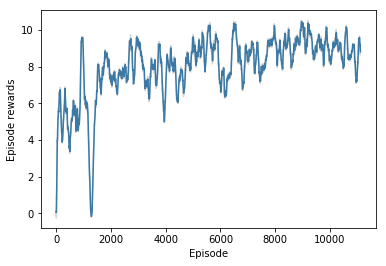

In [27]:
eps, arr = np.array(episode_rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Episode rewards')

Text(0, 0.5, 'Total rewards')

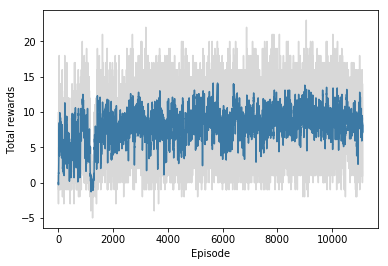

In [28]:
eps, arr = np.array(rewards_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Total rewards')

Text(0, 0.5, 'Average losses')

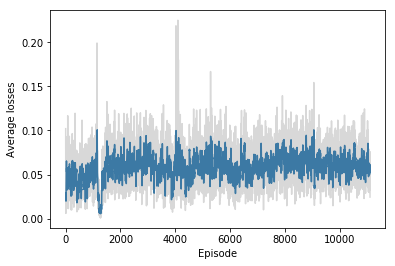

In [29]:
eps, arr = np.array(loss_list).T
smoothed_arr = running_mean(arr, 10)
plt.plot(eps[-len(smoothed_arr):], smoothed_arr)
plt.plot(eps, arr, color='grey', alpha=0.3)
plt.xlabel('Episode')
plt.ylabel('Average losses')

In [30]:
# TF session for training
with tf.Session(graph=graph) as sess:
    sess.run(tf.global_variables_initializer())
    #saver.restore(sess, 'checkpoints/model.ckpt')    
    saver.restore(sess, tf.train.latest_checkpoint('checkpoints'))
    
    # Testing episodes/epochs
    for _ in range(1):
        total_reward = 0
        #state = env.reset()
        env_info = env.reset(train_mode=False)[brain_name] # reset the environment
        state = env_info.vector_observations[0]   # get the current state

        # Testing steps/batches
        while True:
            action_logits = sess.run(model.actions_logits, feed_dict={model.states: state.reshape([1, -1])})
            action = np.argmax(action_logits)
            #state, reward, done, _ = env.step(action)
            env_info = env.step(action)[brain_name]        # send the action to the environment
            state = env_info.vector_observations[0]   # get the next state
            reward = env_info.rewards[0]                   # get the reward
            done = env_info.local_done[0]                  # see if episode has finished
            total_reward += reward
            if done:
                break
                
        print('total_reward: {:.2f}'.format(total_reward))

INFO:tensorflow:Restoring parameters from checkpoints/model.ckpt


total_reward: 2.00


In [ ]:
# Be careful!!!!!!!!!!!!!!!!
# Closing the env
env.close()